In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
from imblearn.over_sampling import SMOTE
from xgboost import XGBRegressor
import warnings
import pandas as pd
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2, f_classif
import re
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/credit score prediction/train.csv')

/tmp/ipython-input-5-910094890.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/credit score prediction/train.csv')


In [214]:
df.sample(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
36919,0xee51,CUS_0x48f7,August,Jonesb,20,989-32-0623,Lawyer,35699.53,2864.960833,6,...,Standard,397.35,24.189180,30 Years and 11 Months,Yes,0.000000,153.65619024476274,Low_spent_Large_value_payments,402.83989308857065,Standard
84901,0x20777,CUS_0x7202,June,Georginax,41,437-84-3976,Lawyer,8089.415,889.117917,6,...,Bad,2864.82,27.587809,14 Years and 2 Months,Yes,1702.000000,52.70085570596726,Low_spent_Medium_value_payments,274.25793340033533,Poor
96011,0x24891,CUS_0x80ca,April,Roumeliotism,46,977-46-1928,Engineer,109744.86000000002,8916.405000,8,...,Standard,55.2,28.273733,32 Years and 5 Months,Yes,72.516053,342.65441110511847,Low_spent_Large_value_payments,746.470035933661,Standard
45951,0x1233d,CUS_0x79d9,August,Leikac,38,091-80-3722,_______,19010.58,1762.819195,9,...,Bad,1519.25,24.935182,6 Years and 3 Months,Yes,118.824291,205.4811228803317,Low_spent_Small_value_payments,232.61189184697963,Standard
82808,0x1fb36,CUS_0x4bdc,January,Jessica Wohlw,22,399-73-2521,Teacher,35007.33,3158.277500,5,...,Good,733.96,40.828122,31 Years and 11 Months,No,0.000000,160.66002666373066,Low_spent_Large_value_payments,425.1677233362694,Good
99455,0x25cbd,CUS_0x3397,August,Sveap,45,097-59-6601,_______,39800.36,3097.696667,8,...,Bad,4241.52,32.797544,1 Years and 5 Months,Yes,252.255601,226.03091323491543,Low_spent_Large_value_payments,101.483153,Standard
74596,0x1cb16,CUS_0x6ccb,May,Nickx,40,095-39-2430,Writer,24312.94,2040.078333,1294,...,Standard,636.21,38.049635,NaN,Yes,120.666197,115.00342244231945,Low_spent_Small_value_payments,258.33821382093157,Poor
20957,0x90cb,CUS_0x938,June,Fiona Ortizn,25,982-93-3710,Architect,12593.445,763.453750,4,...,Standard,43.68,32.897608,16 Years and 8 Months,Yes,18.944548,65.06582696518787,Low_spent_Medium_value_payments,272.33499985510457,Standard
68262,0x1a5f8,CUS_0x3ae1,July,Skariachanv,42,247-21-0508,Scientist,64270.12,5500.843333,6,...,Bad,1326.4,30.291360,9 Years and 5 Months,Yes,69.246684,173.8668923998987,High_spent_Medium_value_payments,556.9707569308008,Poor
9649,0x4e8b,CUS_0xa7aa,February,Philip Blenkinsopu,42,077-76-6515,Musician,21039.96,NaN,3,...,Standard,659.6,32.124839,6 Years and 0 Months,Yes,28.249307,125.78935196728419,Low_spent_Large_value_payments,265.2943413171584,Standard


In [215]:
df.shape

(100000, 28)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [217]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [218]:
df.duplicated().sum()

np.int64(0)

EDA

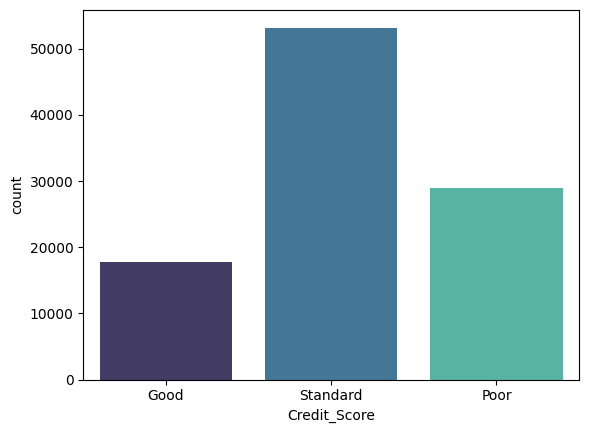

In [10]:
sns.countplot(x=df['Credit_Score'],palette="mako",);

In [11]:
df['Credit_Score'].value_counts(normalize=True)

,proportion
Credit_Score,
Standard,0.53174
Poor,0.28998
Good,0.17828


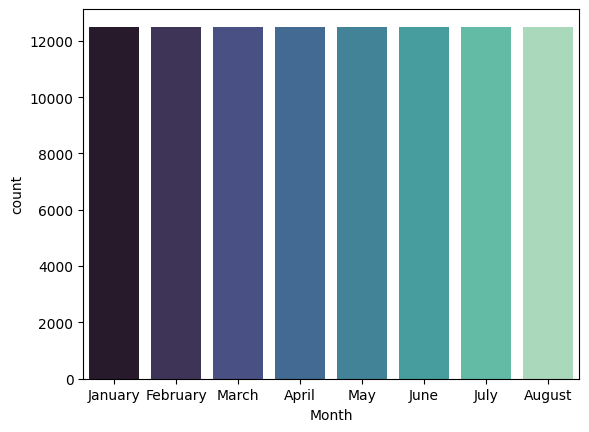

In [12]:
sns.countplot(x=df['Month'],palette="mako");

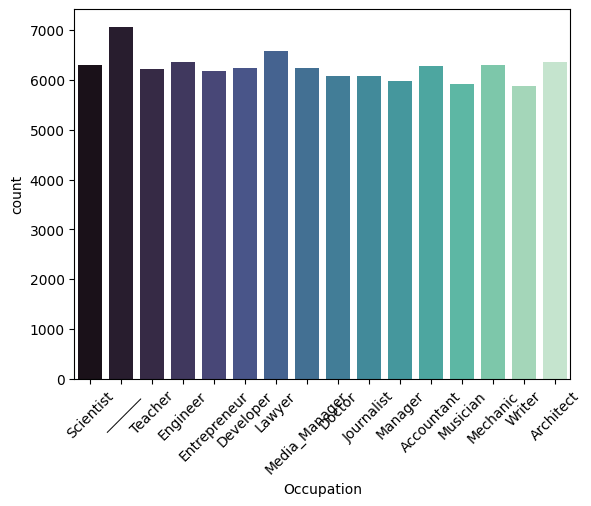

In [13]:
sns.countplot(x=df['Occupation'],palette="mako");
plt.xticks(rotation=45);

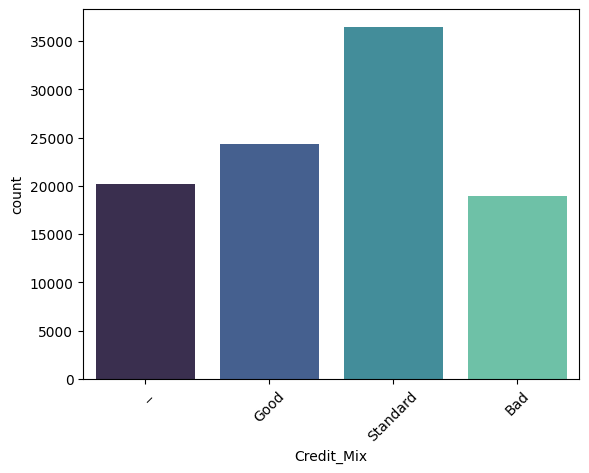

In [14]:
sns.countplot(x=df['Credit_Mix'],palette="mako");
plt.xticks(rotation=45);

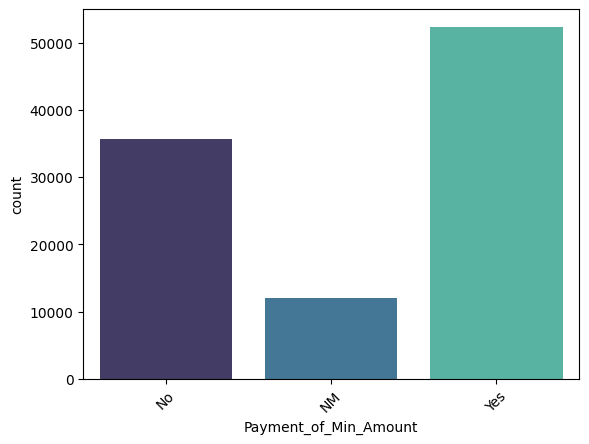

In [15]:
sns.countplot(x=df['Payment_of_Min_Amount'],palette="mako");
plt.xticks(rotation=45);

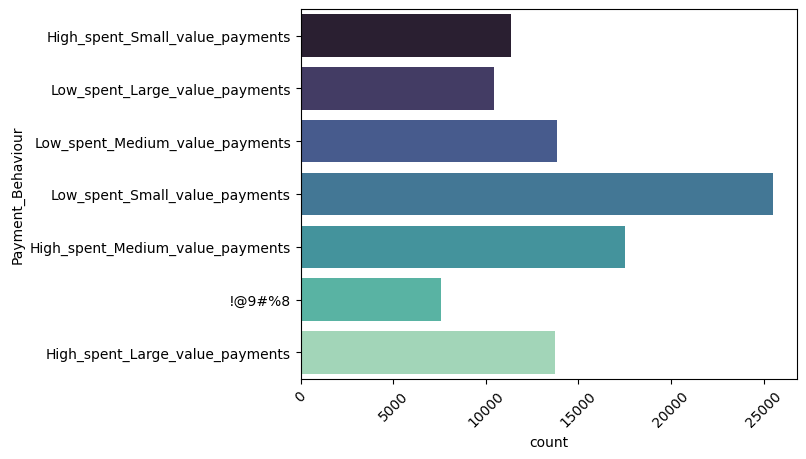

In [16]:
sns.countplot(df['Payment_Behaviour'],palette="mako");
plt.xticks(rotation=45);

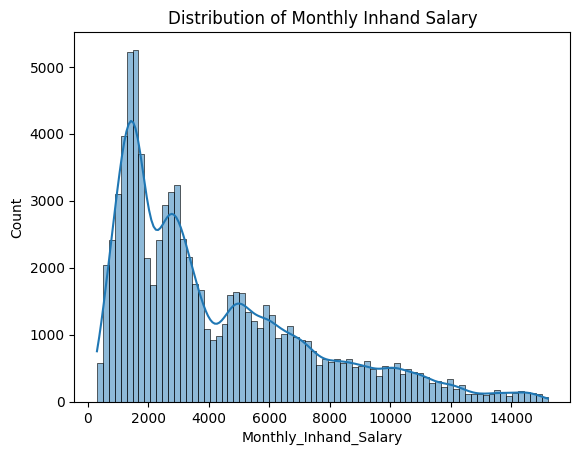

In [17]:
sns.histplot(data=df, x='Monthly_Inhand_Salary', kde=True)
plt.title('Distribution of Monthly Inhand Salary')
plt.show()

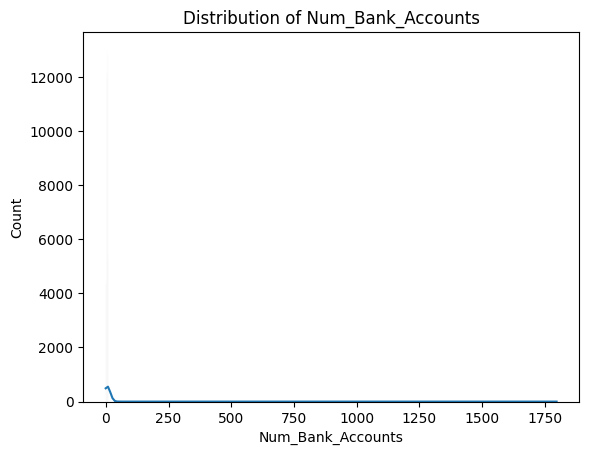

In [18]:
sns.histplot(data=df, x='Num_Bank_Accounts', kde=True)
plt.title('Distribution of Num_Bank_Accounts')
plt.show()

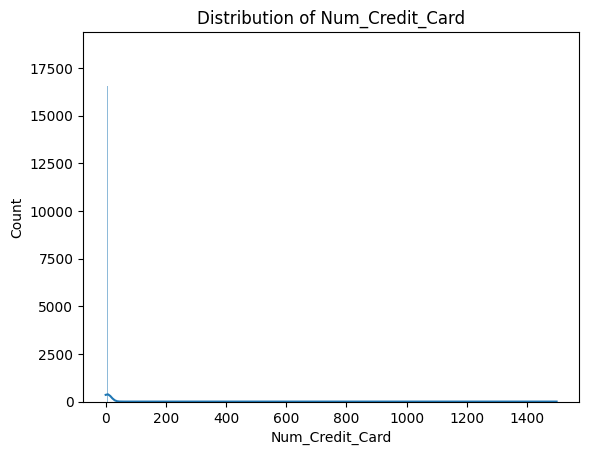

In [20]:
sns.histplot(data=df, x='Num_Credit_Card', kde=True)
plt.title('Distribution of Num_Credit_Card')
plt.show()

/tmp/ipython-input-21-270302000.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Interest_Rate']);


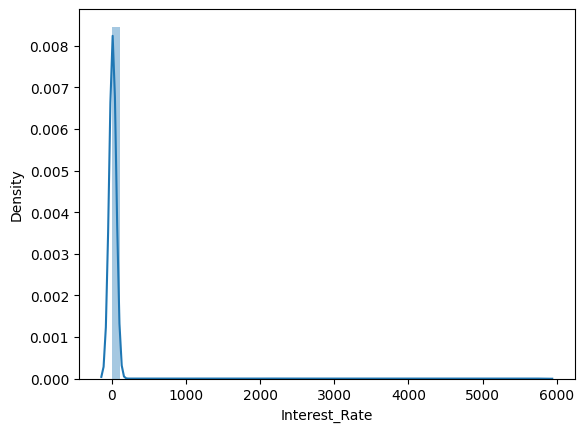

In [21]:
sns.distplot(df['Interest_Rate']);

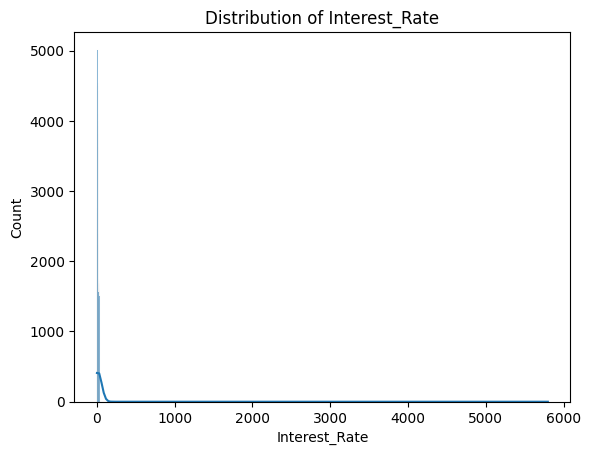

In [22]:
sns.histplot(data=df, x='Interest_Rate', kde=True)
plt.title('Distribution of Interest_Rate')
plt.show()

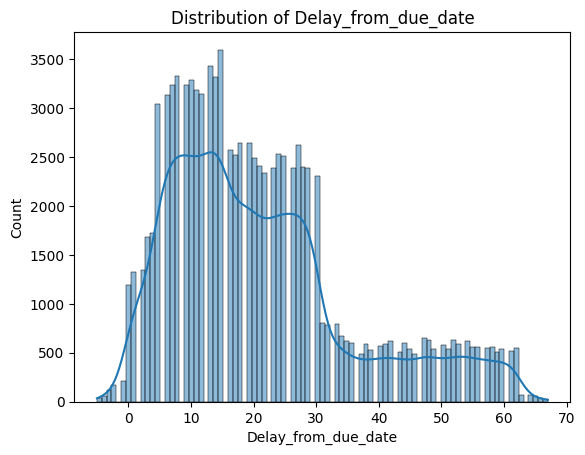

In [23]:
sns.histplot(data=df, x='Delay_from_due_date', kde=True)
plt.title('Distribution of Delay_from_due_date')
plt.show()

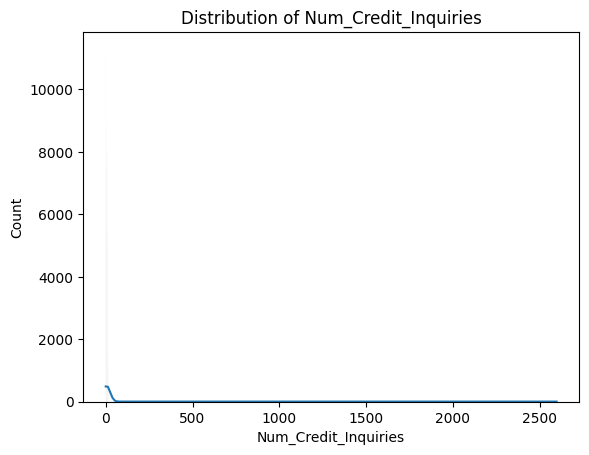

In [24]:
sns.histplot(data=df, x='Num_Credit_Inquiries', kde=True)
plt.title('Distribution of Num_Credit_Inquiries')
plt.show()

In [25]:
df['Type_of_Loan'].value_counts().head(10)

,count
Type_of_Loan,
Not Specified,1408
Credit-Builder Loan,1280
Personal Loan,1272
Debt Consolidation Loan,1264
Student Loan,1240
Payday Loan,1200
Mortgage Loan,1176
Auto Loan,1152
Home Equity Loan,1136


ID, Name and SSN (Not useful)

Age, Annual_Income, Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit,
Amount_invested_monthly, Outstanding_Debt Credit_Mix, Monthly_Balance Numerical but show as catogery (need to be fixed)

Occupation, CreditMix has value "__"

Data contains outliers

Num_Credit_Card has zeros

Type_of_Loan Need to rewrite as 8 columns

Num_Bank_Accounts contains negative values

Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,'Credit_Mix' (needs

Feature Engineering)

Target Columns is Imbalanced

A lot of missing data


BASE LINE MODEL WITH NO PREPROCESSING

In [230]:
# --- 1. Imports ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
import numpy as np

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# This assumes 'df' is your pre-loaded DataFrame
if 'df' in locals() and df is not None:
    print("DataFrame found. Starting the time-series modeling process...")

    # --- 2. Create an Ordered Month Column for Splitting ---
    # This is crucial for performing a correct chronological split.
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['Month_Num'] = df['Month'].map(month_map)

    # --- 3. Time-Based Split (6 Months Train, Rest for Test) ---
    CUTOFF_MONTH = 6
    train_df = df[df['Month_Num'] <= CUTOFF_MONTH].copy()
    test_df = df[df['Month_Num'] > CUTOFF_MONTH].copy()

    print(f"Training data covers months: {sorted(train_df['Month_Num'].unique())}")
    print(f"Testing data covers months: {sorted(test_df['Month_Num'].unique())}")

    # --- 4. Preprocessing (Applied Separately to Train and Test) ---

    # Separate features and target for both sets
    X_train = train_df.drop(['Credit_Score','ID', 'Month_Num','Customer_ID', 'Name', 'SSN'], axis=1)
    y_train = train_df['Credit_Score']

    X_test = test_df.drop(['Credit_Score', 'ID' ,'Month_Num','Customer_ID', 'Name', 'SSN'], axis=1)
    y_test = test_df['Credit_Score']

    # Encode the target variable (y)
    le_target = LabelEncoder()
    y_train_encoded = le_target.fit_transform(y_train)
    y_test_encoded = le_target.transform(y_test)

    # Identify categorical and numerical columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

    # Impute missing values
    # Using the median for numerical columns
    for col in numerical_cols:
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        X_test[col].fillna(median_val, inplace=True) # Use train median on test set

    # Using the mode for categorical columns
    for col in categorical_cols:
        mode_val = X_train[col].mode()[0]
        X_train[col].fillna(mode_val, inplace=True)
        X_test[col].fillna(mode_val, inplace=True) # Use train mode on test set

    # Label Encode categorical features as an alternative to one-hot encoding
    # This is much more memory-efficient and helps prevent crashes.
    print("Using Label Encoding for categorical features to save memory...")
    for col in categorical_cols:
        # FIX: Convert columns to string type to prevent mixed-type errors
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

        le = LabelEncoder()
        # Fit on all possible categories from both train and test sets
        le.fit(pd.concat([X_train[col], X_test[col]]).unique())

        # Transform both train and test data
        X_train[col] = le.transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

    print("✅ Preprocessing complete. Data is split and encoded.")
    print(f"Training features shape: {X_train.shape}")
    print(f"Testing features shape: {X_test.shape}")

    # --- 5. Define Models ---
    models = {
        "RandomForest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        "LightGBM": LGBMClassifier(random_state=42)
    }

    # --- 6. Train and Evaluate Baseline Models ---
    for name, model in models.items():
        print(f"\n--- Training {name} ---")

        # Fit the model with default parameters
        model.fit(X_train, y_train_encoded)

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test_encoded, y_pred)
        print(f"Accuracy for {name}: {accuracy:.4f}")

        report = classification_report(le_target.inverse_transform(y_test_encoded), le_target.inverse_transform(y_pred))
        print(f"Classification Report for {name}:\n{report}")
        print("="*50)
else:
    print("❌ DataFrame 'df' not found. Please load your data first.")


DataFrame found. Starting the time-series modeling process...
Training data covers months: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Testing data covers months: [np.int64(7), np.int64(8)]
Using Label Encoding for categorical features to save memory...
✅ Preprocessing complete. Data is split and encoded.
Training features shape: (75000, 23)
Testing features shape: (25000, 23)

--- Training RandomForest ---
Accuracy for RandomForest: 0.7017
Classification Report for RandomForest:
              precision    recall  f1-score   support

        Good       0.65      0.60      0.62      4824
        Poor       0.71      0.72      0.71      7216
    Standard       0.72      0.73      0.72     12960

    accuracy                           0.70     25000
   macro avg       0.69      0.68      0.69     25000
weighted avg       0.70      0.70      0.70     25000


--- Training XGBoost ---
Accuracy for XGBoost: 0.6828
Classification Report for XGBoost:
         


--- Analyzing Feature Importance for RandomForest ---


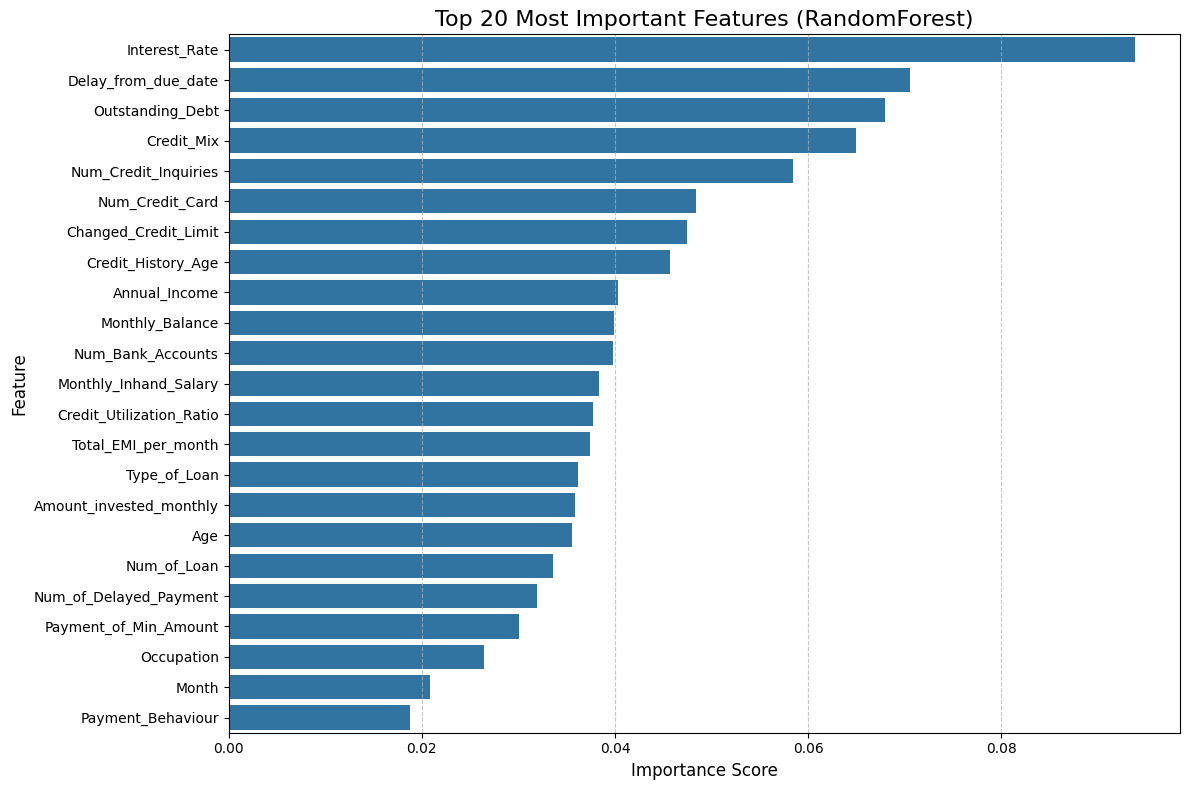


Top 20 Most Important Features (RandomForest):
                     Feature  Importance
7              Interest_Rate    0.093813
10       Delay_from_due_date    0.070569
15          Outstanding_Debt    0.067917
14                Credit_Mix    0.064922
13      Num_Credit_Inquiries    0.058469
6            Num_Credit_Card    0.048380
12      Changed_Credit_Limit    0.047421
17        Credit_History_Age    0.045685
3              Annual_Income    0.040291
22           Monthly_Balance    0.039935
5          Num_Bank_Accounts    0.039812
4      Monthly_Inhand_Salary    0.038337
16  Credit_Utilization_Ratio    0.037683
19       Total_EMI_per_month    0.037373
9               Type_of_Loan    0.036191
20   Amount_invested_monthly    0.035840
1                        Age    0.035579
8                Num_of_Loan    0.033593
11    Num_of_Delayed_Payment    0.031933
18     Payment_of_Min_Amount    0.030103


In [224]:
# --- 7. Feature Importance Analysis (for the best model) ---

# We'll analyze the RandomForest model since it had the highest accuracy.
# The model object is the last one trained in the loop, so we need to retrain RF to be sure.

print("\n--- Analyzing Feature Importance for RandomForest ---")

# Re-initialize and train the RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_encoded)

# Extract feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the features by importance in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance)
plt.title('Top 20 Most Important Features (RandomForest)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# Display the top 20 most important features
print("\nTop 20 Most Important Features (RandomForest):")
print(sorted_feature_importance.head(20))

DataFrame found. Starting the time-series modeling process...
Training data covers months: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Testing data covers months: [np.int64(7), np.int64(8)]

Using Label Encoding for categorical features...
✅ Preprocessing complete. Data is split and encoded.
Training features shape: (75000, 24)
Testing features shape: (25000, 24)

--- Performing Statistical Tests for Feature Selection ---

--- ANOVA F-test results (Numerical vs Target) ---
A low P-Value (< 0.05) suggests the feature is likely correlated with the target.
                    Feature      F-Score       P-Value
0     Monthly_Inhand_Salary  1535.700398  0.000000e+00
4       Delay_from_due_date  9521.544148  0.000000e+00
6  Credit_Utilization_Ratio    93.192929  3.776025e-41
5      Num_Credit_Inquiries     5.479060  4.174921e-03
1         Num_Bank_Accounts     3.487779  3.057365e-02
2           Num_Credit_Card     2.961622  5.174098e-02
3             Intere

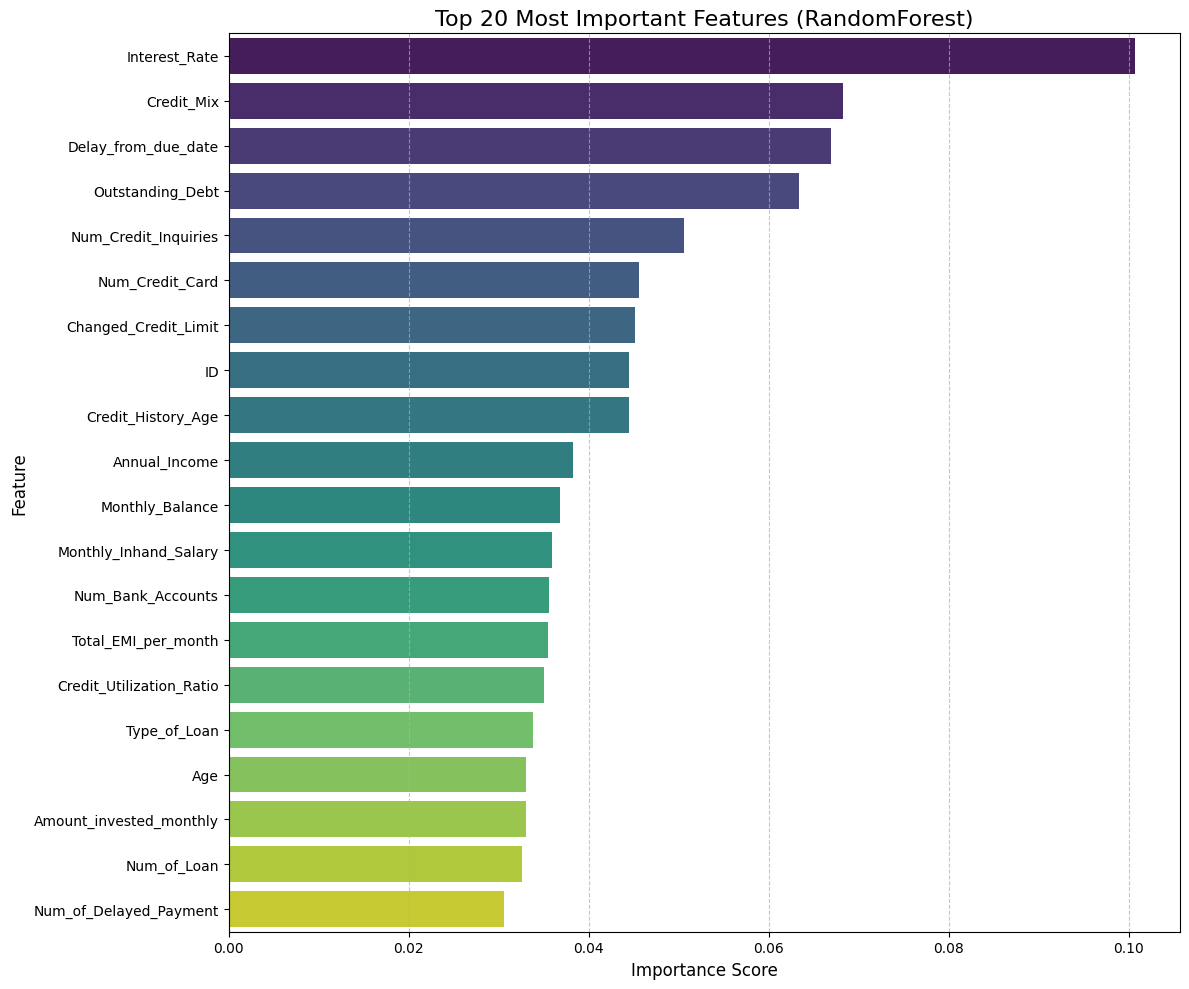

In [232]:
# --- 1. Imports ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import chi2, f_classif
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# This assumes 'df' is your pre-loaded DataFrame
if 'df' in locals() and df is not None:
    print("DataFrame found. Starting the time-series modeling process...")

    # --- 2. Create an Ordered Month Column for Splitting ---
    # This is crucial for performing a correct chronological split.
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['Month_Num'] = df['Month'].map(month_map)
    df = df.sort_values(by=['Customer_ID', 'Month_Num'])

    # --- 3. Time-Based Split (6 Months Train, Rest for Test) ---
    CUTOFF_MONTH = 6
    train_df = df[df['Month_Num'] <= CUTOFF_MONTH].copy()
    test_df = df[df['Month_Num'] > CUTOFF_MONTH].copy()

    print(f"Training data covers months: {sorted(train_df['Month_Num'].unique())}")
    print(f"Testing data covers months: {sorted(test_df['Month_Num'].unique())}")

    # --- 4. Preprocessing (Applied Separately to Train and Test) ---

    # Separate features and target for both sets
    # Dropping identifier columns
    id_cols_to_drop = ['Customer_ID', 'Name', 'SSN']
    X_train = train_df.drop(columns=['Credit_Score', 'Month_Num'] + id_cols_to_drop)
    y_train = train_df['Credit_Score']

    X_test = test_df.drop(columns=['Credit_Score', 'Month_Num'] + id_cols_to_drop)
    y_test = test_df['Credit_Score']

    # Encode the target variable (y)
    le_target = LabelEncoder()
    y_train_encoded = le_target.fit_transform(y_train)
    y_test_encoded = le_target.transform(y_test)

    # Impute missing values before encoding
    # For numeric columns, use the median
    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
    for col in numerical_cols:
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        X_test[col].fillna(median_val, inplace=True)

    # For categorical columns, use the mode
    # Identify categorical columns BEFORE encoding
    categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    for col in categorical_cols:
        mode_val = X_train[col].mode()[0]
        X_train[col].fillna(mode_val, inplace=True)
        X_test[col].fillna(mode_val, inplace=True)

    # Label Encode categorical features
    print("\nUsing Label Encoding for categorical features...")
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()
    for col in categorical_cols:
        X_train_encoded[col] = X_train_encoded[col].astype(str)
        X_test_encoded[col] = X_test_encoded[col].astype(str)

        le = LabelEncoder()
        le.fit(pd.concat([X_train_encoded[col], X_test_encoded[col]]).unique())

        X_train_encoded[col] = le.transform(X_train_encoded[col])
        X_test_encoded[col] = le.transform(X_test_encoded[col])

    # Align columns to prevent errors
    X_train_final, X_test_final = X_train_encoded.align(X_test_encoded, join='inner', axis=1)

    print("✅ Preprocessing complete. Data is split and encoded.")
    print(f"Training features shape: {X_train_final.shape}")
    print(f"Testing features shape: {X_test_final.shape}")

    # --- 5. Statistical Feature Selection ---
    print("\n--- Performing Statistical Tests for Feature Selection ---")

    # FIX: Correctly separate features for testing
    # Numerical features are those NOT in the original categorical_cols list
    numerical_features_for_test = X_train_final.drop(columns=categorical_cols)
    # Categorical features are only those that were originally objects
    categorical_features_for_test = X_train_final[categorical_cols]

    # --- ANOVA F-test for numerical features ---
    if not numerical_features_for_test.empty:
        f_scores, p_values_f = f_classif(numerical_features_for_test, y_train_encoded)
        anova_results = pd.DataFrame({
            'Feature': numerical_features_for_test.columns,
            'F-Score': f_scores,
            'P-Value': p_values_f
        }).sort_values(by='P-Value')
        print("\n--- ANOVA F-test results (Numerical vs Target) ---")
        print("A low P-Value (< 0.05) suggests the feature is likely correlated with the target.")
        print(anova_results.head(15))

    # --- Chi-squared test for categorical features ---
    if not categorical_features_for_test.empty:
        chi_scores, p_values_chi = chi2(categorical_features_for_test, y_train_encoded)
        chi2_results = pd.DataFrame({
            'Feature': categorical_features_for_test.columns,
            'Chi2-Score': chi_scores,
            'P-Value': p_values_chi
        }).sort_values(by='P-Value')
        print("\n--- Chi-squared test results (Categorical vs Target) ---")
        print("A low P-Value (< 0.05) suggests the feature is likely correlated with the target.")
        print(chi2_results.head(15))

    # --- 6. Define Models ---
    models = {
        "RandomForest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        "LightGBM": LGBMClassifier(random_state=42)
    }

    # --- 7. Train and Evaluate Baseline Models ---
    trained_models = {}
    for name, model in models.items():
        print(f"\n--- Training {name} ---")

        # Fit the model with default parameters
        model.fit(X_train_final, y_train_encoded)
        trained_models[name] = model # Store the trained model

        # Make predictions
        y_pred = model.predict(X_test_final)

        # Evaluate the model
        accuracy = accuracy_score(y_test_encoded, y_pred)
        print(f"Accuracy for {name}: {accuracy:.4f}")

        report = classification_report(le_target.inverse_transform(y_test_encoded), le_target.inverse_transform(y_pred))
        print(f"Classification Report for {name}:\n{report}")
        print("="*50)

    # --- 8. Feature Importance Analysis ---
    print("\n--- Analyzing Feature Importance for RandomForest ---")

    # Get the trained RandomForest model from our dictionary
    rf_model = trained_models.get("RandomForest")

    if rf_model:
        # Extract feature importances
        importances = rf_model.feature_importances_

        # Create a DataFrame for better visualization
        feature_importance_df = pd.DataFrame({
            'Feature': X_train_final.columns,
            'Importance': importances
        })

        # Sort the features by importance in descending order
        sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

        # Print the top 20 features
        print("\nTop 20 Most Important Features:")
        print(sorted_feature_importance)

        # Create the plot
        plt.figure(figsize=(12, 10))
        sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance, palette='viridis')
        plt.title('Top 20 Most Important Features (RandomForest)', fontsize=16)
        plt.xlabel('Importance Score', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("Could not find the trained RandomForest model to analyze.")

else:
    print("❌ DataFrame 'df' not found. Please load your data first.")


DataFrame found. Starting the time-series modeling process...

--- Step 1: Engineering Time-Series Features ---
✅ New lag and rolling features created.
Training data covers months: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Testing data covers months: [np.int64(7), np.int64(8)]
Using Label Encoding for categorical features to save memory...
✅ Preprocessing complete. Data is split and encoded.
Training features shape: (75000, 34)
Testing features shape: (25000, 34)

--- Training RandomForest ---
Accuracy for RandomForest: 0.7170
Classification Report for RandomForest:
              precision    recall  f1-score   support

        Good       0.68      0.62      0.65      4824
        Poor       0.72      0.75      0.73      7216
    Standard       0.73      0.73      0.73     12960

    accuracy                           0.72     25000
   macro avg       0.71      0.70      0.70     25000
weighted avg       0.72      0.72      0.72     25000


--- Trai

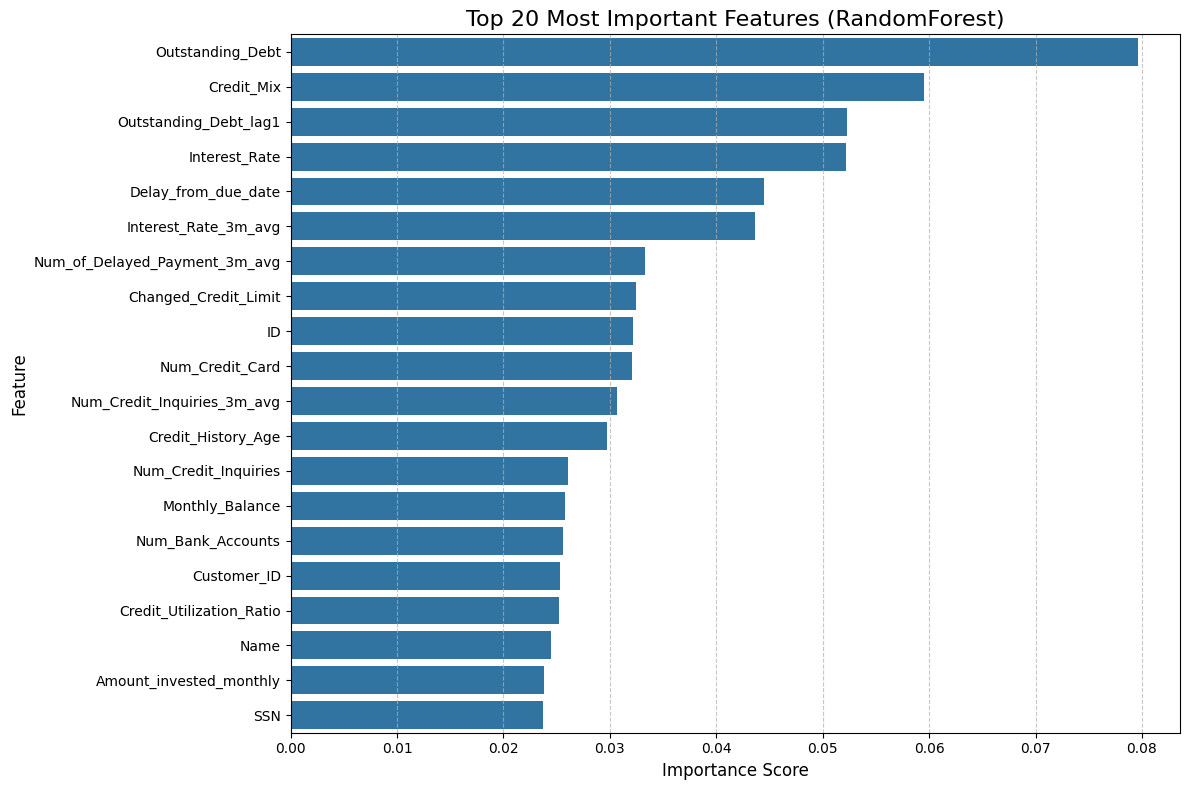

In [36]:
# --- 1. Imports ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as asns

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# This assumes 'df' is your pre-loaded DataFrame
if 'df' in locals() and df is not None:
    print("DataFrame found. Starting the time-series modeling process...")

    # --- 2. Create an Ordered Month Column for Splitting ---
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['Month_Num'] = df['Month'].map(month_map)

    # --- STEP-BY-STEP PREPROCESSING 1: FEATURE ENGINEERING ---
    print("\n--- Step 1: Engineering Time-Series Features ---")

    # Define the features we will be engineering
    lag_features = ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Total_EMI_per_month']
    rolling_features = ['Num_of_Delayed_Payment', 'Interest_Rate', 'Num_Credit_Inquiries']

    # FIX: Ensure columns for engineering are numeric before we begin.
    # This prevents the "No numeric types to aggregate" error.
    features_to_convert = lag_features + rolling_features
    for col in features_to_convert:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # First, ensure data is sorted correctly by customer and time
    df_sorted = df.sort_values(by=['Customer_ID', 'Month_Num']).copy()

    # Create lag features (value from the previous month)
    for col in lag_features:
        df_sorted[f'{col}_lag1'] = df_sorted.groupby('Customer_ID')[col].shift(1)

    # Create rolling window features (average over the last 3 months)
    for col in rolling_features:
        df_sorted[f'{col}_3m_avg'] = df_sorted.groupby('Customer_ID')[col].transform(
            lambda x: x.rolling(window=3, min_periods=1).mean()
        )

    print("✅ New lag and rolling features created.")

    # The original 'df' is now the feature-engineered 'df_sorted'
    df = df_sorted

    # --- 3. Time-Based Split (6 Months Train, Rest for Test) ---
    CUTOFF_MONTH = 6
    train_df = df[df['Month_Num'] <= CUTOFF_MONTH].copy()
    test_df = df[df['Month_Num'] > CUTOFF_MONTH].copy()

    print(f"Training data covers months: {sorted(train_df['Month_Num'].unique())}")
    print(f"Testing data covers months: {sorted(test_df['Month_Num'].unique())}")

    # --- 4. Preprocessing (Applied Separately to Train and Test) ---

    # Separate features and target for both sets
    X_train = train_df.drop(['Credit_Score', 'Month_Num'], axis=1)
    y_train = train_df['Credit_Score']

    X_test = test_df.drop(['Credit_Score', 'Month_Num'], axis=1)
    y_test = test_df['Credit_Score']

    # Encode the target variable (y)
    le_target = LabelEncoder()
    y_train_encoded = le_target.fit_transform(y_train)
    y_test_encoded = le_target.transform(y_test)

    # Identify categorical and numerical columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

    # Impute missing values
    # Using the median for numerical columns
    for col in numerical_cols:
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        X_test[col].fillna(median_val, inplace=True) # Use train median on test set

    # Using the mode for categorical columns
    for col in categorical_cols:
        mode_val = X_train[col].mode()[0]
        X_train[col].fillna(mode_val, inplace=True)
        X_test[col].fillna(mode_val, inplace=True) # Use train mode on test set

    # Label Encode categorical features as an alternative to one-hot encoding
    print("Using Label Encoding for categorical features to save memory...")
    for col in categorical_cols:
        # FIX: Convert columns to string type to prevent mixed-type errors
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

        le = LabelEncoder()
        # Fit on all possible categories from both train and test sets
        le.fit(pd.concat([X_train[col], X_test[col]]).unique())

        # Transform both train and test data
        X_train[col] = le.transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

    print("✅ Preprocessing complete. Data is split and encoded.")
    print(f"Training features shape: {X_train.shape}")
    print(f"Testing features shape: {X_test.shape}")

    # --- 5. Define Models ---
    models = {
        "RandomForest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        "LightGBM": LGBMClassifier(random_state=42)
    }

    # --- 6. Train and Evaluate Baseline Models ---
    # Store the trained models to access the best one later
    trained_models = {}
    for name, model in models.items():
        print(f"\n--- Training {name} ---")

        # Fit the model with default parameters
        model.fit(X_train, y_train_encoded)
        trained_models[name] = model # Store the trained model

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test_encoded, y_pred)
        print(f"Accuracy for {name}: {accuracy:.4f}")

        report = classification_report(le_target.inverse_transform(y_test_encoded), le_target.inverse_transform(y_pred))
        print(f"Classification Report for {name}:\n{report}")
        print("="*50)

    # --- 7. Plot Feature Importance for the Best Model (RandomForest) ---
    print("\n--- Analyzing Feature Importance for RandomForest ---")

    # Get the trained RandomForest model
    best_model = trained_models.get("RandomForest")

    if best_model:
        # Extract feature importances
        importances = best_model.feature_importances_

        # Create a DataFrame for better visualization
        feature_importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importances
        })

        # Sort the features by importance
        sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

        # Create the plot
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance)
        plt.title('Top 20 Most Important Features (RandomForest)', fontsize=16)
        plt.xlabel('Importance Score', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("Could not find the trained RandomForest model to analyze.")

else:
    print("❌ DataFrame 'df' not found. Please load your data first.")


DataFrame found. Starting the time-series modeling process...

--- Step 1: Engineering Time-Series Features ---
✅ New lag and rolling features created.
Training data covers months: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Testing data covers months: [np.int64(7), np.int64(8)]
Using Label Encoding for categorical features to save memory...
✅ Preprocessing complete. Data is split and encoded.

--- Step 2: Tuning RandomForest with GridSearchCV ---
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Best Parameters found: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

--- Evaluating Tuned RandomForest Model ---
Accuracy for Tuned RandomForest: 0.6503
Classification Report for Tuned RandomForest:
              precision    recall  f1-score   support

        Good       0.52      0.60      0.55      4824
        Poor       0.67      0.65      0.66      7216
    Standard       0.70      0.67      0.68     

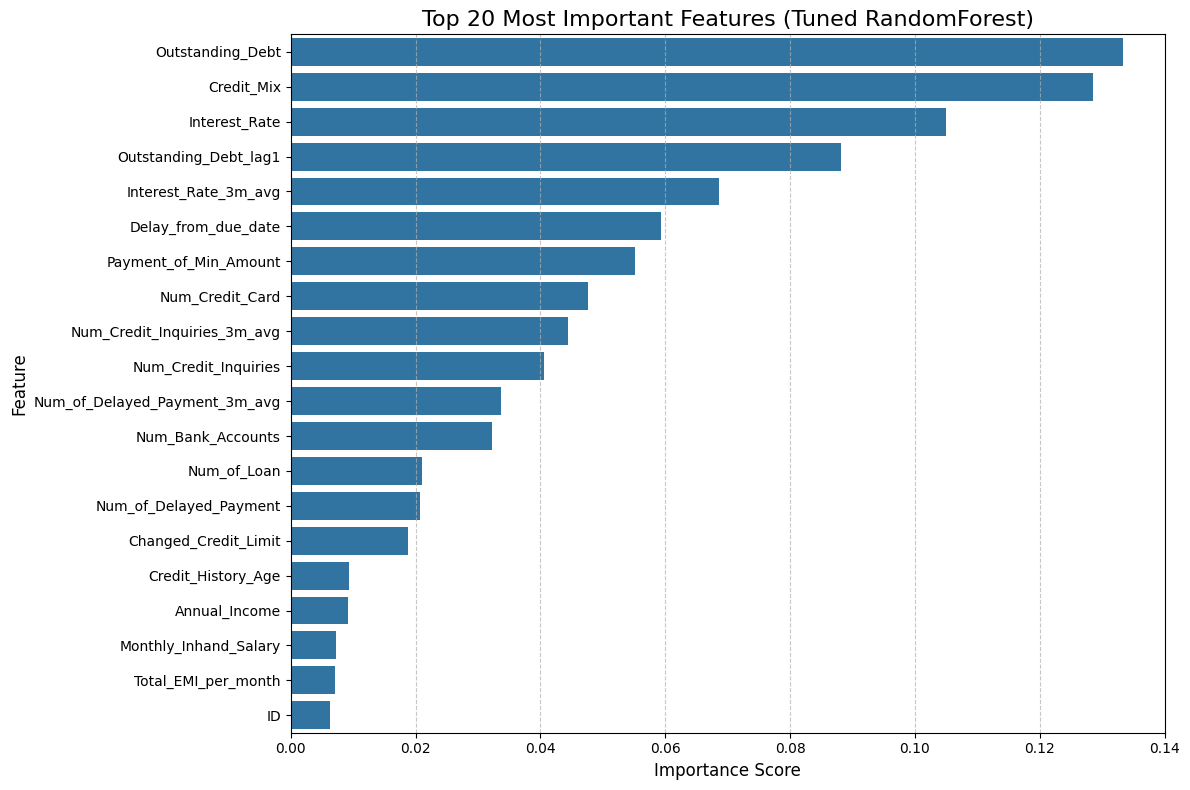

In [37]:
# --- 1. Imports ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# This assumes 'df' is your pre-loaded DataFrame
if 'df' in locals() and df is not None:
    print("DataFrame found. Starting the time-series modeling process...")

    # --- 2. Create an Ordered Month Column for Splitting ---
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['Month_Num'] = df['Month'].map(month_map)

    # --- STEP 1: FEATURE ENGINEERING ---
    print("\n--- Step 1: Engineering Time-Series Features ---")

    # Define the features we will be engineering
    lag_features = ['Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt', 'Total_EMI_per_month']
    rolling_features = ['Num_of_Delayed_Payment', 'Interest_Rate', 'Num_Credit_Inquiries']

    # Ensure columns for engineering are numeric before we begin.
    features_to_convert = lag_features + rolling_features
    for col in features_to_convert:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # First, ensure data is sorted correctly by customer and time
    df_sorted = df.sort_values(by=['Customer_ID', 'Month_Num']).copy()

    # Create lag features (value from the previous month)
    for col in lag_features:
        df_sorted[f'{col}_lag1'] = df_sorted.groupby('Customer_ID')[col].shift(1)

    # Create rolling window features (average over the last 3 months)
    for col in rolling_features:
        df_sorted[f'{col}_3m_avg'] = df_sorted.groupby('Customer_ID')[col].transform(
            lambda x: x.rolling(window=3, min_periods=1).mean()
        )

    print("✅ New lag and rolling features created.")

    # The original 'df' is now the feature-engineered 'df_sorted'
    df = df_sorted

    # --- 3. Time-Based Split (6 Months Train, Rest for Test) ---
    CUTOFF_MONTH = 6
    train_df = df[df['Month_Num'] <= CUTOFF_MONTH].copy()
    test_df = df[df['Month_Num'] > CUTOFF_MONTH].copy()

    print(f"Training data covers months: {sorted(train_df['Month_Num'].unique())}")
    print(f"Testing data covers months: {sorted(test_df['Month_Num'].unique())}")

    # --- 4. Preprocessing (Applied Separately to Train and Test) ---

    # Separate features and target for both sets
    X_train = train_df.drop(['Credit_Score', 'Month_Num'], axis=1)
    y_train = train_df['Credit_Score']

    X_test = test_df.drop(['Credit_Score', 'Month_Num'], axis=1)
    y_test = test_df['Credit_Score']

    # Encode the target variable (y)
    le_target = LabelEncoder()
    y_train_encoded = le_target.fit_transform(y_train)
    y_test_encoded = le_target.transform(y_test)

    # Identify categorical and numerical columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

    # Impute missing values
    for col in numerical_cols:
        median_val = X_train[col].median()
        X_train[col].fillna(median_val, inplace=True)
        X_test[col].fillna(median_val, inplace=True)

    for col in categorical_cols:
        mode_val = X_train[col].mode()[0]
        X_train[col].fillna(mode_val, inplace=True)
        X_test[col].fillna(mode_val, inplace=True)

    # Label Encode categorical features
    print("Using Label Encoding for categorical features to save memory...")
    for col in categorical_cols:
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

        le = LabelEncoder()
        le.fit(pd.concat([X_train[col], X_test[col]]).unique())

        X_train[col] = le.transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

    print("✅ Preprocessing complete. Data is split and encoded.")

    # --- STEP 2: HYPERPARAMETER TUNING (for the best model) ---
    print("\n--- Step 2: Tuning RandomForest with GridSearchCV ---")

    # Define a parameter grid to search
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    # Set up GridSearchCV
    grid_search = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid,
        cv=3, # 3-fold cross-validation
        n_jobs=-1, # Use all available CPU cores
        scoring='accuracy',
        verbose=1
    )

    # Train the model
    grid_search.fit(X_train, y_train_encoded)

    # Get the best estimator
    best_rf_model = grid_search.best_estimator_

    print(f"\nBest Parameters found: {grid_search.best_params_}")

    # --- 6. Evaluate the Tuned Model ---
    print("\n--- Evaluating Tuned RandomForest Model ---")
    y_pred = best_rf_model.predict(X_test)

    accuracy = accuracy_score(y_test_encoded, y_pred)
    print(f"Accuracy for Tuned RandomForest: {accuracy:.4f}")

    report = classification_report(le_target.inverse_transform(y_test_encoded), le_target.inverse_transform(y_pred))
    print(f"Classification Report for Tuned RandomForest:\n{report}")
    print("="*50)

    # --- 7. Plot Feature Importance for the Tuned Model ---
    print("\n--- Analyzing Feature Importance for Tuned RandomForest ---")

    importances = best_rf_model.feature_importances_
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
    sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance)
    plt.title('Top 20 Most Important Features (Tuned RandomForest)', fontsize=16)
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

else:
    print("❌ DataFrame 'df' not found. Please load your data first.")


# Data Cleaning

In [6]:
df = pd.read_csv('/content/drive/MyDrive/credit score prediction/train.csv')

/tmp/ipython-input-6-910094890.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/credit score prediction/train.csv')


In [7]:
columns_to_drop = ['ID', 'Name', 'SSN']  # List of column names to drop
df = df.drop(columns=columns_to_drop)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  object 
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  object 
 5   Monthly_Inhand_Salary     84998 non-null   float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  object 
 10  Type_of_Loan              88592 non-null   object 
 11  Delay_from_due_date       100000 non-null  int64  
 12  Num_of_Delayed_Payment    92998 non-null   object 
 13  Changed_Credit_Limit      100000 non-null  ob

In [9]:

df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,CUS_0xd40,February,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,CUS_0xd40,March,-500,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,CUS_0xd40,April,23,Scientist,19114.12,NaN,3,4,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Remove UnderScore

In [10]:
def clean_underscore_formatting( df):
        """Clean underscore formatting issues like __1000__ or 809_"""
        print("Cleaning underscore formatting...")

        # Define columns that might have underscore issues
        cols_to_process = [
        'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
        'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
        'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
        'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
        'Amount_invested_monthly', 'Monthly_Balance'
    ]

        for col in cols_to_process:
            if col in df.columns:
                # Remove underscores and other problematic characters
                df[col] = df[col].astype(str).str.replace('_', '', regex=False)
                # Convert to numeric. 'coerce' will turn any non-numeric values into NaN
                df[col] = pd.to_numeric(df[col], errors='coerce')

        return df

In [11]:
df = clean_underscore_formatting(df)

Cleaning underscore formatting...


In [12]:
df.Age.describe()

,Age
count,100000.000000
mean,110.649700
std,686.244717
min,-500.000000
25%,24.000000
50%,33.000000
75%,42.000000
max,8698.000000


# fix age outliers

In [13]:
def fix_age_outliers(df):
        """Fix age outliers and ensure consistency per customer"""
        print("Fixing age outliers...")

        def fix_customer_age(group):
            ages = pd.to_numeric(group['Age'], errors='coerce')

            # Remove outliers (age should be reasonable)
            valid_ages = ages[(ages >= 18) & (ages <= 100)]
            if len(valid_ages) > 0:
                # Use most frequent valid age for this customer
                most_frequent_age = valid_ages.mode().iloc[0] if len(valid_ages.mode()) > 0 else valid_ages.median()
                group['Age'] = most_frequent_age
            else:
                # If no valid ages, use overall median from all valid ages in dataset
                all_ages = pd.to_numeric(df['Age'], errors='coerce')
                overall_median = all_ages[(all_ages >= 18) & (all_ages <= 100)].median()
                group['Age'] = overall_median if pd.notna(overall_median) else 30
            return group

        df = df.groupby('Customer_ID').apply(fix_customer_age).reset_index(drop=True)
        return df

In [14]:
df = fix_age_outliers(df)

Fixing age outliers...


/tmp/ipython-input-13-4267711536.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Customer_ID').apply(fix_customer_age).reset_index(drop=True)


In [15]:
df.Age.describe()

,Age
count,100000.00000
mean,34.29872
std,9.85935
min,18.00000
25%,26.00000
50%,34.00000
75%,42.00000
max,56.00000


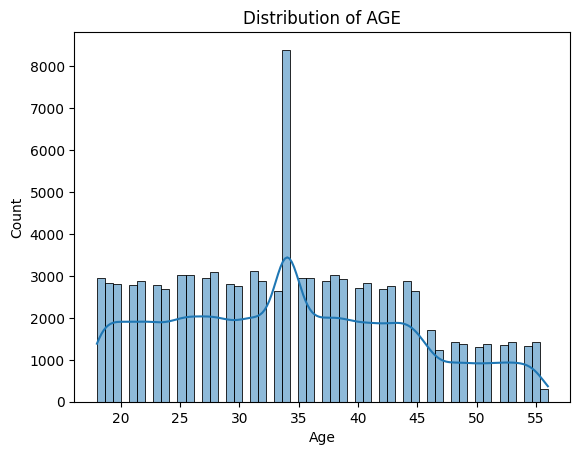

In [16]:
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribution of AGE')
plt.show()

# fix outliers for columns that should be consistance per customer

In [244]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,3.429872e+01,9.859350e+00,1.800000e+01,26.000000,34.000000,42.000000,5.600000e+01
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7.005930e+03,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4.194171e+03,3.183686e+03,3.036454e+02,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,1.709128e+01,1.174048e+02,-1.000000e+00,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,2.247443e+01,1.290574e+02,0.000000e+00,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,7.246604e+01,4.664226e+02,1.000000e+00,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,3.009960e+00,6.264788e+01,-1.000000e+02,1.000000,3.000000,5.000000,1.496000e+03
Delay_from_due_date,100000.0,2.106878e+01,1.486010e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,92998.0,3.092334e+01,2.260319e+02,-3.000000e+00,9.000000,14.000000,18.000000,4.397000e+03
Changed_Credit_Limit,97909.0,1.038903e+01,6.789496e+00,-6.490000e+00,5.320000,9.400000,14.870000,3.697000e+01


In [17]:
    def fix_outliers_per_customer(df):
        """Fix outliers for columns that should be constant per customer"""
        print("Fixing outliers for customer-consistent columns...")

        customer_constant_cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                                  'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_Credit_Inquiries','Total_EMI_per_month','Num_of_Delayed_Payment']
        def fix_customer_outliers(group, col):
            values = pd.to_numeric(group[col], errors='coerce').dropna()
            if len(values) > 0:
                # Use most frequent value, fallback to median
                try:
                    most_frequent = values.mode().iloc[0] if len(values.mode()) > 0 else values.median()
                except:
                    most_frequent = values.median()
                group[col] = most_frequent
            return group

        for col in customer_constant_cols:
            if col in df.columns:
                df = df.groupby('Customer_ID').apply(lambda x: fix_customer_outliers(x, col)).reset_index(drop=True)

        return df

In [18]:
df = fix_outliers_per_customer(df)

Fixing outliers for customer-consistent columns...


/tmp/ipython-input-17-3360345582.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Customer_ID').apply(lambda x: fix_customer_outliers(x, col)).reset_index(drop=True)
/tmp/ipython-input-17-3360345582.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Customer_ID').apply(lambda x: fix_customer_outliers(x, col)).reset_index(drop=True)
/tmp/ipython-input-17-3360345582.py:

In [247]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,3.429872e+01,9.859350e+00,1.800000e+01,26.000000,34.000000,42.000000,56.000000
Annual_Income,100000.0,5.050512e+04,3.829942e+04,7.005930e+03,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,100000.0,4.197328e+03,3.186919e+03,3.036454e+02,1626.719792,3092.270000,5958.695625,15204.633333
Num_Bank_Accounts,100000.0,5.367520e+00,2.593321e+00,-1.000000e+00,3.000000,5.000000,7.000000,10.000000
Num_Credit_Card,100000.0,5.532720e+00,2.067504e+00,0.000000e+00,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,1.453208e+01,8.741330e+00,1.000000e+00,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.532880e+00,2.446356e+00,0.000000e+00,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,2.106878e+01,1.486010e+01,-5.000000e+00,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,1.326360e+01,6.201788e+00,-2.000000e+00,9.000000,14.000000,18.000000,28.000000
Changed_Credit_Limit,97909.0,1.038903e+01,6.789496e+00,-6.490000e+00,5.320000,9.400000,14.870000,36.970000


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  int64  
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      100000 non-null  fl

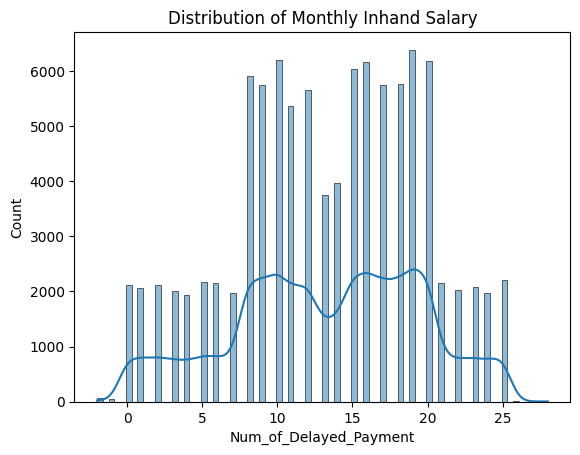

In [249]:
sns.histplot(data=df, x='Num_of_Delayed_Payment', kde=True)
plt.title('Distribution of Monthly Inhand Salary')
plt.show()

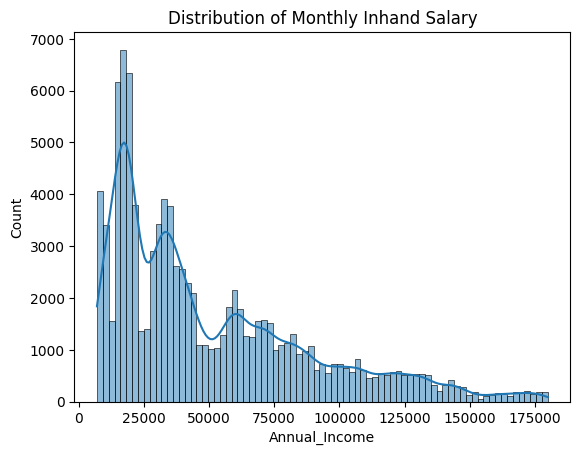

In [250]:
sns.histplot(data=df, x='Annual_Income', kde=True)
plt.title('Distribution of Monthly Inhand Salary')
plt.show()

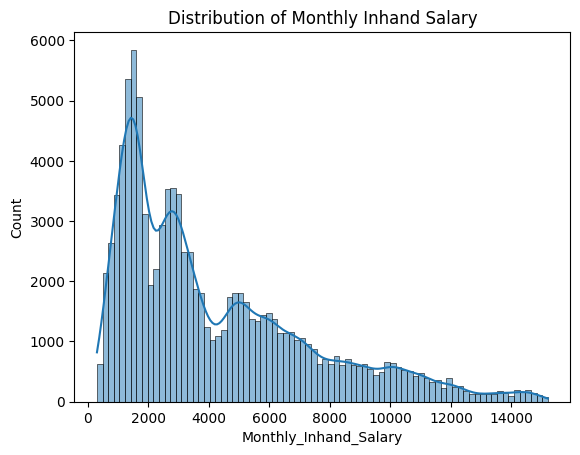

In [251]:
sns.histplot(data=df, x='Monthly_Inhand_Salary', kde=True)
plt.title('Distribution of Monthly Inhand Salary')
plt.show()

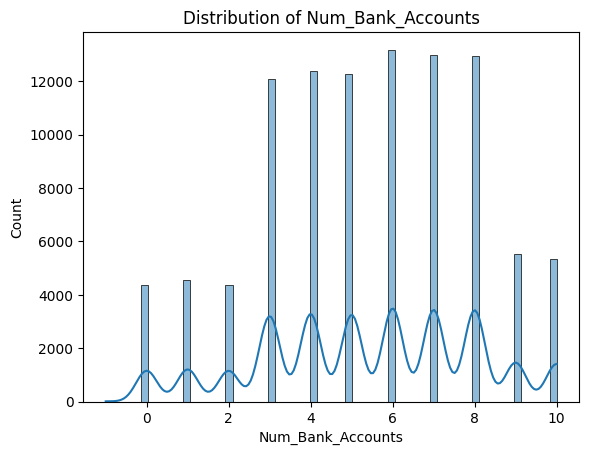

In [252]:
sns.histplot(data=df, x='Num_Bank_Accounts', kde=True)
plt.title('Distribution of Num_Bank_Accounts')
plt.show()

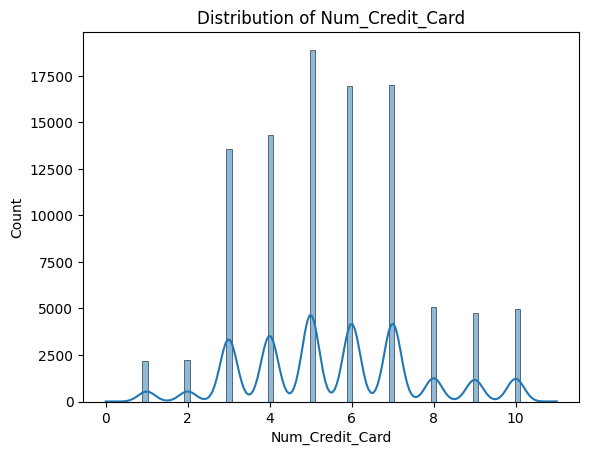

In [253]:
sns.histplot(data=df, x='Num_Credit_Card', kde=True)
plt.title('Distribution of Num_Credit_Card')
plt.show()

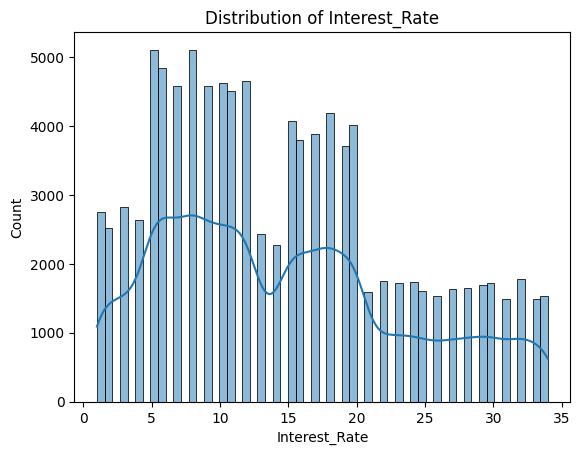

In [254]:
sns.histplot(data=df, x='Interest_Rate', kde=True)
plt.title('Distribution of Interest_Rate')
plt.show()

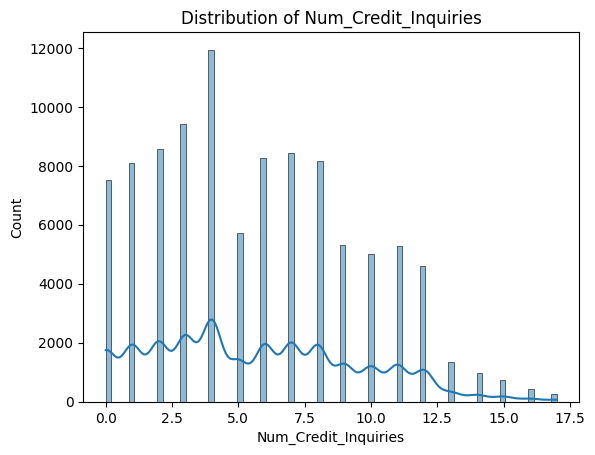

In [255]:
sns.histplot(data=df, x='Num_Credit_Inquiries', kde=True)
plt.title('Distribution of Num_Credit_Inquiries')
plt.show()

In [256]:
customer_id = 'CUS_0xa16e'
customer_df = df[df['Customer_ID'] == customer_id]
display(customer_df.head(8).T)

,77848,77849,77850,77851,77852,77853,77854,77855
Customer_ID,CUS_0xa16e,CUS_0xa16e,CUS_0xa16e,CUS_0xa16e,CUS_0xa16e,CUS_0xa16e,CUS_0xa16e,CUS_0xa16e
Month,January,February,March,April,May,June,July,August
Age,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0
Occupation,Media_Manager,Media_Manager,Media_Manager,Media_Manager,Media_Manager,_______,Media_Manager,Media_Manager
Annual_Income,10183.015,10183.015,10183.015,10183.015,10183.015,10183.015,10183.015,10183.015
Monthly_Inhand_Salary,1074.584583,1074.584583,1074.584583,1074.584583,1074.584583,1074.584583,1074.584583,1074.584583
Num_Bank_Accounts,7,7,7,7,7,7,7,7
Num_Credit_Card,5,5,5,5,5,5,5,5
Interest_Rate,17,17,17,17,17,17,17,17
Num_of_Loan,5,5,5,5,5,5,5,5


In [257]:
df['Delay_from_due_date'].describe()

,Delay_from_due_date
count,100000.000000
mean,21.068780
std,14.860104
min,-5.000000
25%,10.000000
50%,18.000000
75%,28.000000
max,67.000000


In [19]:
    def fix_delayed_payments(df):
        """Fix Num_of_Delayed_Payment: make positive, then fix outliers"""
        print("Fixing Negative values in Delayed payment and num of delayed payment...")

        if 'Num_of_Delayed_Payment' and 'Delay_from_due_date' in df.columns:
            # Convert to numeric first, then make positive
            df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce').abs()
            df['Delay_from_due_date'] = pd.to_numeric(df['Delay_from_due_date'], errors='coerce').abs()
        return df

In [20]:
df = fix_delayed_payments(df)

Fixing Negative values in Delayed payment and num of delayed payment...


In [21]:
df['Delay_from_due_date'].describe()

,Delay_from_due_date
count,100000.000000
mean,21.095040
std,14.822802
min,0.000000
25%,10.000000
50%,18.000000
75%,28.000000
max,67.000000


In [22]:
df['Num_of_Delayed_Payment'].describe()

,Num_of_Delayed_Payment
count,100000.000000
mean,13.267120
std,6.194255
min,0.000000
25%,9.000000
50%,14.000000
75%,18.000000
max,28.000000


In [23]:
def impute_occupation_by_customer(df):
    """Fills missing 'Occupation' values with the most frequent occupation for each customer."""
    print("Imputing 'Occupation' based on customer's most frequent value...")
    if 'Occupation' in df.columns:
        df.loc[df['Occupation'] == '_______', 'Occupation'] = np.nan
        df['Occupation'] = df.groupby('Customer_ID')['Occupation'].transform(
            lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
        )
    return df

In [24]:
df = impute_occupation_by_customer(df)

Imputing 'Occupation' based on customer's most frequent value...


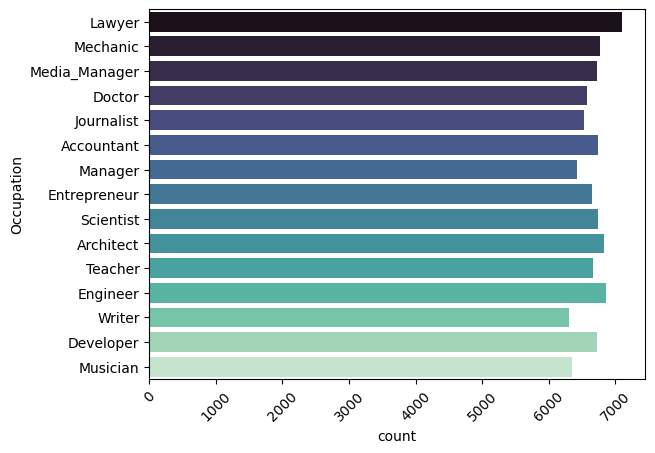

In [264]:
sns.countplot(df['Occupation'],palette="mako");
plt.xticks(rotation=45);

In [265]:
customer_id = 'CUS_0xac86'
customer_df = df[df['Customer_ID'] == customer_id]
display(customer_df.head(8).T)

,83808,83809,83810,83811,83812,83813,83814,83815
Customer_ID,CUS_0xac86,CUS_0xac86,CUS_0xac86,CUS_0xac86,CUS_0xac86,CUS_0xac86,CUS_0xac86,CUS_0xac86
Month,January,February,March,April,May,June,July,August
Age,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
Occupation,Entrepreneur,Entrepreneur,Entrepreneur,Entrepreneur,Entrepreneur,Entrepreneur,Entrepreneur,Entrepreneur
Annual_Income,106733.13,106733.13,106733.13,106733.13,106733.13,106733.13,106733.13,106733.13
Monthly_Inhand_Salary,8873.4275,8873.4275,8873.4275,8873.4275,8873.4275,8873.4275,8873.4275,8873.4275
Num_Bank_Accounts,4,4,4,4,4,4,4,4
Num_Credit_Card,4,4,4,4,4,4,4,4
Interest_Rate,1,1,1,1,1,1,1,1
Num_of_Loan,0,0,0,0,0,0,0,0


In [25]:
def clean_categorical_features(df):
    """Cleans trailing underscores from specific categorical columns like Credit_Mix."""
    print("Cleaning categorical features like 'Credit_Mix'...")

    # Define categorical columns that might have underscore issues
    categorical_clean_cols = ['Credit_Mix']

    for col in categorical_clean_cols:
        if col in df.columns:
            # Ensure the column is string type, then remove the underscore
            df[col] = df[col].astype(str).str.replace('_', '', regex=False)

    return df

In [26]:
df =  clean_categorical_features(df)

Cleaning categorical features like 'Credit_Mix'...


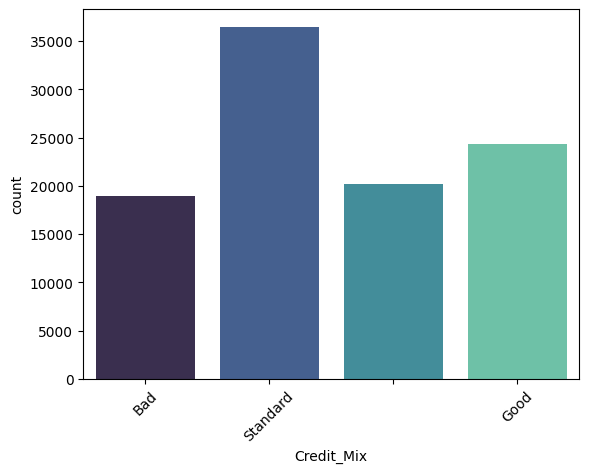

In [268]:
sns.countplot(x=df['Credit_Mix'],palette="mako");
plt.xticks(rotation=45);

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       100000 non-null  float64
 3   Occupation                100000 non-null  object 
 4   Annual_Income             100000 non-null  float64
 5   Monthly_Inhand_Salary     100000 non-null  float64
 6   Num_Bank_Accounts         100000 non-null  int64  
 7   Num_Credit_Card           100000 non-null  int64  
 8   Interest_Rate             100000 non-null  int64  
 9   Num_of_Loan               100000 non-null  int64  
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      100000 non-null  fl

In [27]:
df['Payment_Behaviour']= df['Payment_Behaviour'].replace("!@9#%8",np.nan)

In [28]:
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,25513
High_spent_Medium_value_payments,17540
Low_spent_Medium_value_payments,13861
High_spent_Large_value_payments,13721
High_spent_Small_value_payments,11340
Low_spent_Large_value_payments,10425


In [29]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(df[['Payment_Behaviour']])
df[['Payment_Behaviour']] = imputer.transform(df[['Payment_Behaviour']])

In [30]:
df['Payment_Behaviour'].unique()

array(['Low_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'Low_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

# Fill  

1.   changed in credit limit
2.   credit history age
3.   amount invested monthly
4.   monthly balance



In [31]:
    def convert_credit_history_age( df):
        """Convert Credit_History_Age to total months"""
        print("Converting credit history age to months...")

        def parse_credit_history(text):
            if pd.isna(text) or text == 'NA':
                return np.nan

            # Extract years and months using regex
            text = str(text)
            years_match = re.search(r'(\d+)\s*Years?', text, re.IGNORECASE)
            months_match = re.search(r'(\d+)\s*Months?', text, re.IGNORECASE)

            years = int(years_match.group(1)) if years_match else 0
            months = int(months_match.group(1)) if months_match else 0

            return years * 12 + months

        df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(parse_credit_history)

        # Fill missing values with progression pattern per customer
        def fill_credit_history(group):
            if group['Credit_History_Age_Months'].isna().all():
                return group

            # Sort by month order
            month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                          'July', 'August', 'September', 'October', 'November', 'December']
            group['Month_Num'] = group['Month'].map({month: i for i, month in enumerate(month_order)})
            group = group.sort_values('Month_Num')

            # Forward fill and add incremental months
            first_valid = group['Credit_History_Age_Months'].first_valid_index()
            if first_valid is not None:
                base_value = group.loc[first_valid, 'Credit_History_Age_Months']
                for i, idx in enumerate(group.index):
                    if pd.isna(group.loc[idx, 'Credit_History_Age_Months']):
                        group.loc[idx, 'Credit_History_Age_Months'] = base_value + i

            group = group.drop('Month_Num', axis=1)
            return group

        df = df.groupby('Customer_ID').apply(fill_credit_history).reset_index(drop=True)
        return df

In [32]:
df = convert_credit_history_age(df)

Converting credit history age to months...


/tmp/ipython-input-31-2459470678.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Customer_ID').apply(fill_credit_history).reset_index(drop=True)


In [33]:
df = df.drop('Credit_History_Age', axis=1)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Customer_ID                100000 non-null  object 
 1   Month                      100000 non-null  object 
 2   Age                        100000 non-null  float64
 3   Occupation                 100000 non-null  object 
 4   Annual_Income              100000 non-null  float64
 5   Monthly_Inhand_Salary      100000 non-null  float64
 6   Num_Bank_Accounts          100000 non-null  int64  
 7   Num_Credit_Card            100000 non-null  int64  
 8   Interest_Rate              100000 non-null  int64  
 9   Num_of_Loan                100000 non-null  int64  
 10  Type_of_Loan               88592 non-null   object 
 11  Delay_from_due_date        100000 non-null  int64  
 12  Num_of_Delayed_Payment     100000 non-null  float64
 13  Changed_Credit_Limit       979

for Changed_Credit_Limit Impute with 0.

Reasoning: A missing value in this column most likely means there was no change to the customer's credit limit in that specific month

testing the model

DataFrame found. Starting the time-series modeling process...
Training data covers months: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Testing data covers months: [np.int64(7), np.int64(8)]
Using Label Encoding for categorical features to save memory...
✅ Preprocessing complete. Data is split and encoded.
Training features shape: (75000, 22)
Testing features shape: (25000, 22)

--- Training RandomForest ---
Accuracy for RandomForest: 0.7231
Classification Report for RandomForest:
              precision    recall  f1-score   support

        Good       0.70      0.63      0.66      4824
        Poor       0.71      0.77      0.74      7216
    Standard       0.74      0.73      0.73     12960

    accuracy                           0.72     25000
   macro avg       0.72      0.71      0.71     25000
weighted avg       0.72      0.72      0.72     25000


--- Training XGBoost ---
Accuracy for XGBoost: 0.6979
Classification Report for XGBoost:
         

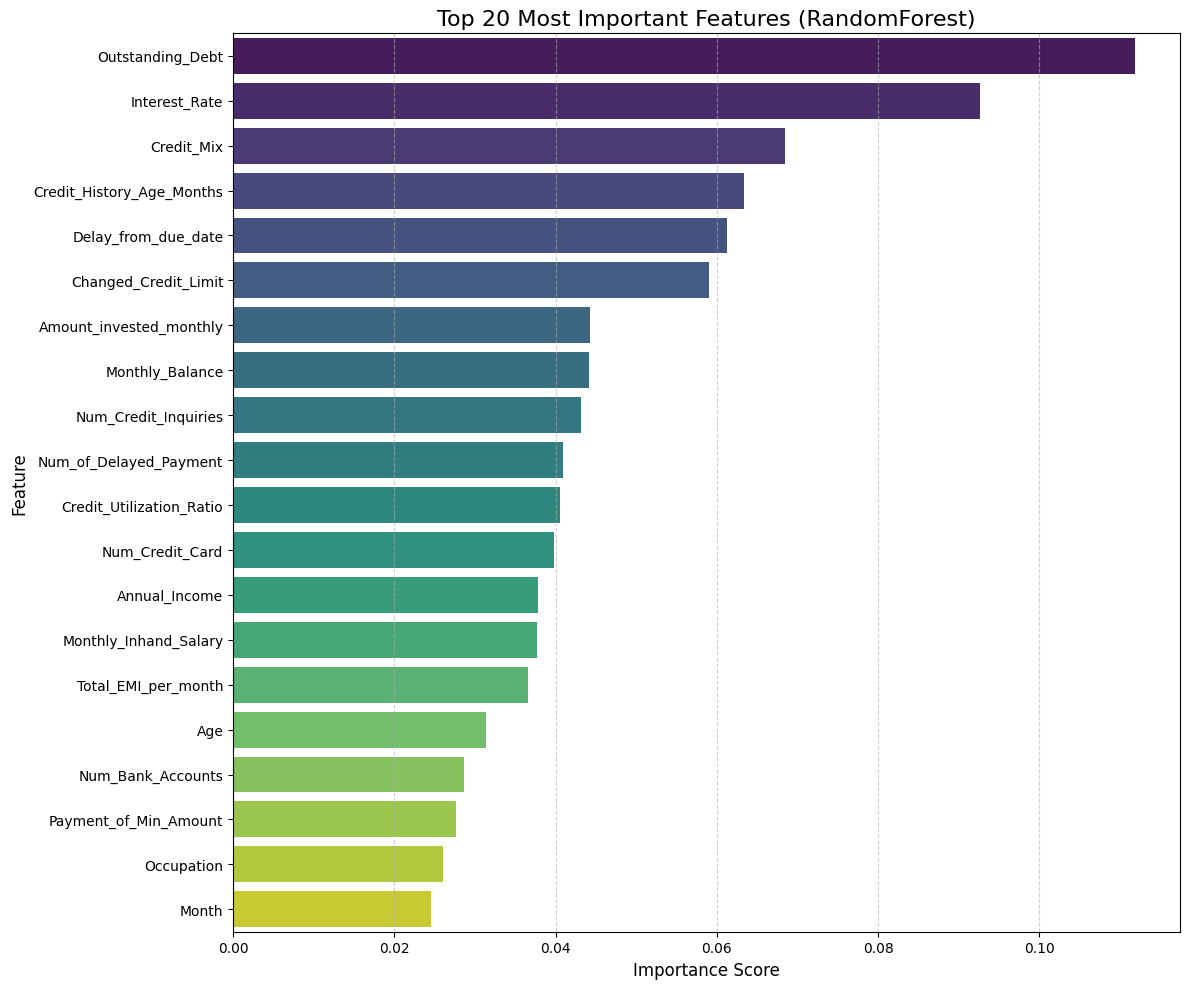

In [278]:
# --- 1. Imports ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
import numpy as np

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# This assumes 'df' is your pre-loaded DataFrame
if 'df' in locals() and df is not None:
    print("DataFrame found. Starting the time-series modeling process...")

    # --- 2. Create an Ordered Month Column for Splitting ---
    # This is crucial for performing a correct chronological split.
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['Month_Num'] = df['Month'].map(month_map)
    df = df.sort_values(by=['Customer_ID', 'Month_Num'])
    # --- 3. Time-Based Split (6 Months Train, Rest for Test) ---
    CUTOFF_MONTH = 6
    train_df = df[df['Month_Num'] <= CUTOFF_MONTH].copy()
    test_df = df[df['Month_Num'] > CUTOFF_MONTH].copy()

    print(f"Training data covers months: {sorted(train_df['Month_Num'].unique())}")
    print(f"Testing data covers months: {sorted(test_df['Month_Num'].unique())}")

    # --- 4. Preprocessing (Applied Separately to Train and Test) ---

    def impute_missing_data(train_df, test_df):
        """Handles all missing value imputation with intelligent strategies."""
        print("Step 3: Imputing missing data...")

        # Strategy 1: Fill 'Changed_Credit_Limit' with 0, as NaN likely means no change.
        train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].fillna(0)
        test_df['Changed_Credit_Limit'] = test_df['Changed_Credit_Limit'].fillna(0)
        print("  - Imputed 'Changed_Credit_Limit' with 0.")

        # Strategy 2: Forward-fill transactional data per customer.
        # This is a time-series aware imputation. We combine, ffill, then split back.
        # This correctly allows the last known value from training to fill the first missing value in testing.
        ffill_cols = ['Monthly_Balance', 'Amount_invested_monthly']

        # Store original indices to split back correctly
        train_indices = train_df.index
        test_indices = test_df.index

        # Combine the dataframes
        combined_df = pd.concat([train_df, test_df])

        # Sort by customer and time to ensure correct ffill order
        combined_df = combined_df.sort_values(by=['Customer_ID', 'Month_Num'])

        # Apply groupby and forward fill
        combined_df[ffill_cols] = combined_df.groupby('Customer_ID')[ffill_cols].ffill()

        # Split back into train and test
        train_imputed = combined_df.loc[train_indices].copy()
        test_imputed = combined_df.loc[test_indices].copy()
        print(f"  - Forward-filled {ffill_cols}.")

        # Strategy 3: Impute any remaining NaNs with a global median (as a fallback)
        # This handles cases where a customer has NO data at all for a column.
        remaining_numeric_cols = train_imputed.select_dtypes(include=np.number).columns
        for col in remaining_numeric_cols:
            if train_imputed[col].isnull().any():
                median_val = train_imputed[col].median() # Calculate median from training data only
                train_imputed[col].fillna(median_val, inplace=True)
                test_imputed[col].fillna(median_val, inplace=True)
                print(f"  - Fallback: Imputed remaining NaNs in '{col}' with training data median.")

        return train_imputed, test_imputed
    # Separate features and target for both sets
    X_train = train_df.drop(['Credit_Score', 'Month_Num', 'Customer_ID'], axis=1)
    y_train = train_df['Credit_Score']

    X_test = test_df.drop(['Credit_Score', 'Month_Num', 'Customer_ID'], axis=1)
    y_test = test_df['Credit_Score']

    # Encode the target variable (y)
    le_target = LabelEncoder()
    y_train_encoded = le_target.fit_transform(y_train)
    y_test_encoded = le_target.transform(y_test)

    # Identify categorical and numerical columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

    # Impute missing values
    # Using the median for numerical columns
    # for col in numerical_cols:
    #     median_val = X_train[col].median()
    #     X_train[col].fillna(median_val, inplace=True)
    #     X_test[col].fillna(median_val, inplace=True) # Use train median on test set

    # # Using the mode for categorical columns
    # for col in categorical_cols:
    #     mode_val = X_train[col].mode()[0]
    #     X_train[col].fillna(mode_val, inplace=True)
    #     X_test[col].fillna(mode_val, inplace=True) # Use train mode on test set

    # Label Encode categorical features as an alternative to one-hot encoding
    # This is much more memory-efficient and helps prevent crashes.
    print("Using Label Encoding for categorical features to save memory...")
    for col in categorical_cols:
        # FIX: Convert columns to string type to prevent mixed-type errors
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

        le = LabelEncoder()
        # Fit on all possible categories from both train and test sets
        le.fit(pd.concat([X_train[col], X_test[col]]).unique())

        # Transform both train and test data
        X_train[col] = le.transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

    print("✅ Preprocessing complete. Data is split and encoded.")
    print(f"Training features shape: {X_train.shape}")
    print(f"Testing features shape: {X_test.shape}")

    # --- 5. Define Models ---
    models = {
        "RandomForest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        "LightGBM": LGBMClassifier(random_state=42)
    }

    # --- 6. Train and Evaluate Baseline Models ---
    trained_models = {}
    for name, model in models.items():
        print(f"\n--- Training {name} ---")

        # Fit the model with default parameters
        model.fit(X_train, y_train_encoded)
        trained_models[name] = model # Store the trained model

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test_encoded, y_pred)
        print(f"Accuracy for {name}: {accuracy:.4f}")

        report = classification_report(le_target.inverse_transform(y_test_encoded), le_target.inverse_transform(y_pred))
        print(f"Classification Report for {name}:\n{report}")
        print("="*50)

    # --- 7. Feature Importance Analysis ---
    print("\n--- Analyzing Feature Importance for RandomForest ---")

    # Get the trained RandomForest model from our dictionary
    rf_model = trained_models.get("RandomForest")

    if rf_model:
        # Extract feature importances
        importances = rf_model.feature_importances_

        # Create a DataFrame for better visualization
        feature_importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importances
        })

        # Sort the features by importance in descending order
        sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

        # Print the top 20 features
        print("\nTop 20 Most Important Features:")
        print(sorted_feature_importance)

        # Create the plot
        plt.figure(figsize=(12, 10))
        sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance, palette='viridis')
        plt.title('Top 20 Most Important Features (RandomForest)', fontsize=16)
        plt.xlabel('Importance Score', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print("Could not find the trained RandomForest model to analyze.")

else:
    print("❌ DataFrame 'df' not found. Please load your data first.")


Feature Enginnering

In [279]:
# # Sort data by Customer_ID and Month_Num to make sure we can correctly access the previous months' data
# df = df.sort_values(by=['Customer_ID', 'Month_Num'])

# # Creating lag features: Previous month's data for each customer
# df['Previous_Month_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].shift(1)
# df['Previous_Month_Income'] = df.groupby('Customer_ID')['Monthly_Inhand_Salary'].shift(1)
# df['Previous_Month_Num_of_Loan'] = df.groupby('Customer_ID')['Num_of_Loan'].shift(1)
# df['Previous_Month_Credit_Utilization'] = df.groupby('Customer_ID')['Credit_Utilization_Ratio'].shift(1)

# # Drop rows with NaN created by lagging (typically for the first month of each customer)
# df.dropna(subset=['Previous_Month_Balance', 'Previous_Month_Income', 'Previous_Month_Num_of_Loan', 'Previous_Month_Credit_Utilization'], inplace=True)


In [280]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Month_Num,Previous_Month_Balance,Previous_Month_Income,Previous_Month_Num_of_Loan,Previous_Month_Credit_Utilization
1,CUS_0x1000,February,18.0,Lawyer,30625.94,2706.161667,6,5,27,2,...,176.132567,High_spent_Small_value_payments,311.542510,Poor,123.0,2,252.924793,2706.161667,2.0,26.612093
2,CUS_0x1000,March,18.0,Lawyer,30625.94,2706.161667,6,5,27,2,...,109.056519,High_spent_Medium_value_payments,368.618557,Poor,124.0,3,311.542510,2706.161667,2.0,29.439759
3,CUS_0x1000,April,18.0,Lawyer,30625.94,2706.161667,6,5,27,2,...,87.909909,Low_spent_Small_value_payments,419.765167,Poor,125.0,4,368.618557,2706.161667,2.0,38.285928
4,CUS_0x1000,May,18.0,Lawyer,30625.94,2706.161667,6,5,27,2,...,191.834767,Low_spent_Large_value_payments,305.840309,Poor,126.0,5,419.765167,2706.161667,2.0,32.843081
5,CUS_0x1000,June,18.0,Lawyer,30625.94,2706.161667,6,5,27,2,...,114.802401,High_spent_Small_value_payments,372.872676,Poor,127.0,6,305.840309,2706.161667,2.0,32.330508


In [281]:
# # 3-month rolling average for 'Monthly_Balance'
# df['Rolling_3Month_Avg_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# # 3-month rolling sum for 'Outstanding_Debt'
# df['Rolling_3Month_Sum_Outstanding_Debt'] = df.groupby('Customer_ID')['Outstanding_Debt'].transform(lambda x: x.rolling(window=3, min_periods=1).sum())

# # You can also create rolling max or min, if needed
# df['Rolling_3Month_Max_Balance'] = df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.rolling(window=3, min_periods=1).max())


In [282]:
# # Cumulative sum for the customer’s outstanding debt
# df['Cumulative_Outstanding_Debt'] = df.groupby('Customer_ID')['Outstanding_Debt'].cumsum()

# # Cumulative number of delayed payments
# df['Cumulative_Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].cumsum()

# # Total credit inquiries over time
# df['Cumulative_Num_Credit_Inquiries'] = df.groupby('Customer_ID')['Num_Credit_Inquiries'].cumsum()


In [283]:
# # Calculate the change in the number of delayed payments
# df['Change_in_Num_of_Delayed_Payment'] = df.groupby('Customer_ID')['Num_of_Delayed_Payment'].diff()

# # If the customer’s delayed payment count is reducing over time, it indicates improved payment behavior


DataFrame found. Starting the time-series modeling process...
Training data covers months: [np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Testing data covers months: [np.int64(7), np.int64(8)]
Using Label Encoding for categorical features to save memory...
✅ Preprocessing complete. Data is split and encoded.
Training features shape: (61751, 33)
Testing features shape: (24696, 33)

--- Training RandomForest ---
Accuracy for RandomForest: 0.7185
Classification Report for RandomForest:
              precision    recall  f1-score   support

        Good       0.71      0.58      0.64      4755
        Poor       0.73      0.72      0.73      7129
    Standard       0.72      0.77      0.74     12812

    accuracy                           0.72     24696
   macro avg       0.72      0.69      0.70     24696
weighted avg       0.72      0.72      0.72     24696


--- Training XGBoost ---
Accuracy for XGBoost: 0.6919
Classification Report for XGBoost:
              precisio

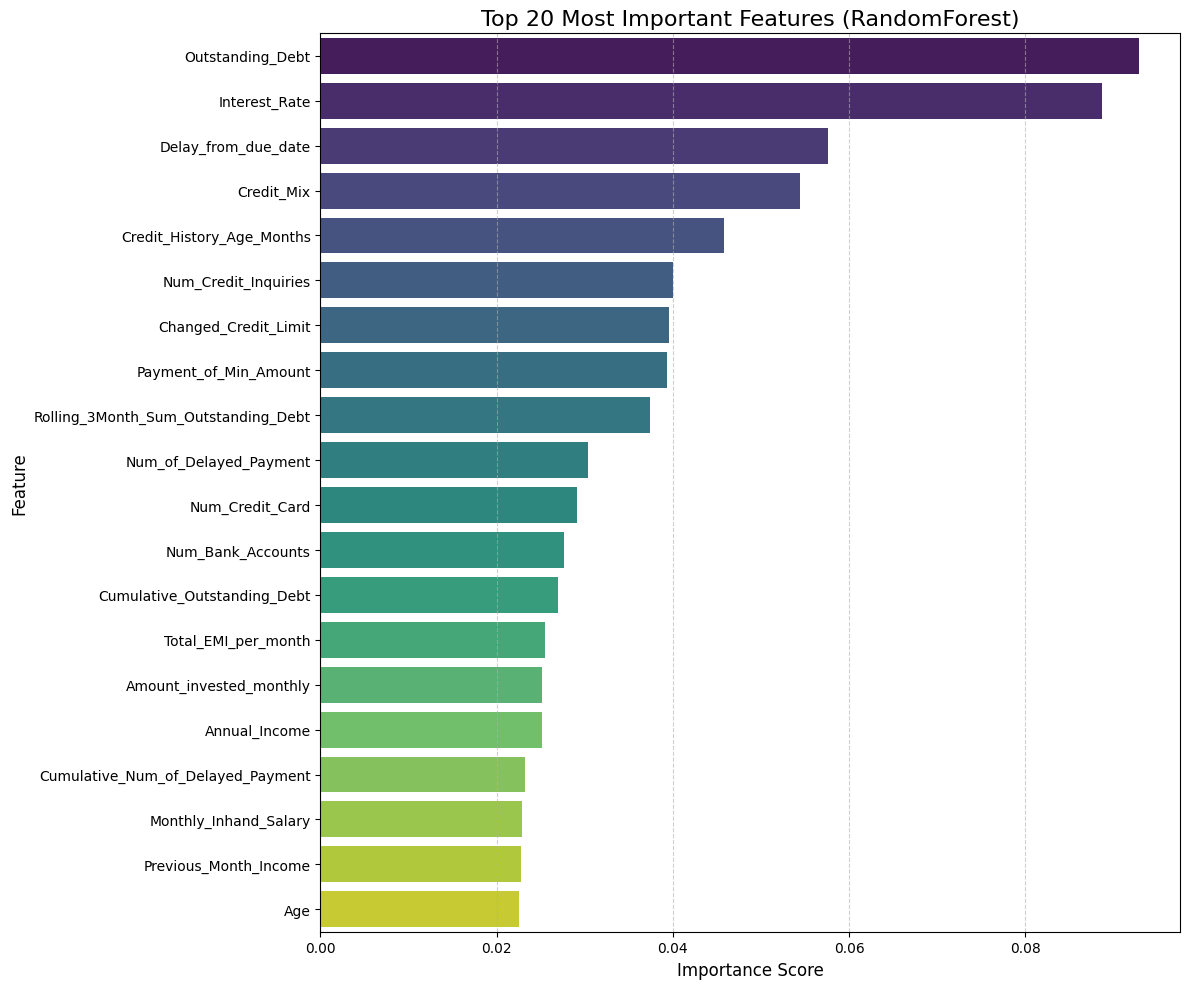

In [291]:
# --- 1. Imports ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
import numpy as np

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# This assumes 'df' is your pre-loaded DataFrame
if 'df' in locals() and df is not None:
    print("DataFrame found. Starting the time-series modeling process...")

    # --- 2. Create an Ordered Month Column for Splitting ---
    # This is crucial for performing a correct chronological split.
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['Month_Num'] = df['Month'].map(month_map)
    df = df.sort_values(by=['Customer_ID', 'Month_Num'])
    # --- 3. Time-Based Split (6 Months Train, Rest for Test) ---
    CUTOFF_MONTH = 6
    train_df = df[df['Month_Num'] <= CUTOFF_MONTH].copy()
    test_df = df[df['Month_Num'] > CUTOFF_MONTH].copy()

    print(f"Training data covers months: {sorted(train_df['Month_Num'].unique())}")
    print(f"Testing data covers months: {sorted(test_df['Month_Num'].unique())}")

    # --- 4. Preprocessing (Applied Separately to Train and Test) ---

    def impute_missing_data(train_df, test_df):
        """Handles all missing value imputation with intelligent strategies."""
        print("Step 3: Imputing missing data...")

        # Strategy 1: Fill 'Changed_Credit_Limit' with 0, as NaN likely means no change.
        train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].fillna(0)
        test_df['Changed_Credit_Limit'] = test_df['Changed_Credit_Limit'].fillna(0)
        print("  - Imputed 'Changed_Credit_Limit' with 0.")

        # Strategy 2: Forward-fill transactional data per customer.
        # This is a time-series aware imputation. We combine, ffill, then split back.
        # This correctly allows the last known value from training to fill the first missing value in testing.
        ffill_cols = ['Monthly_Balance', 'Amount_invested_monthly']

        # Store original indices to split back correctly
        train_indices = train_df.index
        test_indices = test_df.index

        # Combine the dataframes
        combined_df = pd.concat([train_df, test_df])

        # Sort by customer and time to ensure correct ffill order
        combined_df = combined_df.sort_values(by=['Customer_ID', 'Month_Num'])

        # Apply groupby and forward fill
        combined_df[ffill_cols] = combined_df.groupby('Customer_ID')[ffill_cols].ffill()

        # Split back into train and test
        train_imputed = combined_df.loc[train_indices].copy()
        test_imputed = combined_df.loc[test_indices].copy()
        print(f"  - Forward-filled {ffill_cols}.")

        # Strategy 3: Impute any remaining NaNs with a global median (as a fallback)
        # This handles cases where a customer has NO data at all for a column.
        remaining_numeric_cols = train_imputed.select_dtypes(include=np.number).columns
        for col in remaining_numeric_cols:
            if train_imputed[col].isnull().any():
                median_val = train_imputed[col].median() # Calculate median from training data only
                train_imputed[col].fillna(median_val, inplace=True)
                test_imputed[col].fillna(median_val, inplace=True)
                print(f"  - Fallback: Imputed remaining NaNs in '{col}' with training data median.")

        return train_imputed, test_imputed
    # Separate features and target for both sets
    X_train = train_df.drop(['Credit_Score', 'Month_Num', 'Customer_ID'], axis=1)
    y_train = train_df['Credit_Score']

    X_test = test_df.drop(['Credit_Score', 'Month_Num', 'Customer_ID'], axis=1)
    y_test = test_df['Credit_Score']

    # Encode the target variable (y)
    le_target = LabelEncoder()
    y_train_encoded = le_target.fit_transform(y_train)
    y_test_encoded = le_target.transform(y_test)

    # Identify categorical and numerical columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

    # Impute missing values
    # Using the median for numerical columns
    # for col in numerical_cols:
    #     median_val = X_train[col].median()
    #     X_train[col].fillna(median_val, inplace=True)
    #     X_test[col].fillna(median_val, inplace=True) # Use train median on test set

    # # Using the mode for categorical columns
    # for col in categorical_cols:
    #     mode_val = X_train[col].mode()[0]
    #     X_train[col].fillna(mode_val, inplace=True)
    #     X_test[col].fillna(mode_val, inplace=True) # Use train mode on test set

    # Label Encode categorical features as an alternative to one-hot encoding
    # This is much more memory-efficient and helps prevent crashes.
    print("Using Label Encoding for categorical features to save memory...")
    for col in categorical_cols:
        # FIX: Convert columns to string type to prevent mixed-type errors
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

        le = LabelEncoder()
        # Fit on all possible categories from both train and test sets
        le.fit(pd.concat([X_train[col], X_test[col]]).unique())

        # Transform both train and test data
        X_train[col] = le.transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

    print("✅ Preprocessing complete. Data is split and encoded.")
    print(f"Training features shape: {X_train.shape}")
    print(f"Testing features shape: {X_test.shape}")

    # --- 5. Define Models ---
    models = {
        "RandomForest": RandomForestClassifier(random_state=42,class_weight='balanced'),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        "LightGBM": LGBMClassifier(random_state=42)
    }

    # --- 6. Train and Evaluate Baseline Models ---
    trained_models = {}
    for name, model in models.items():
        print(f"\n--- Training {name} ---")

        # Fit the model with default parameters
        model.fit(X_train, y_train_encoded)
        trained_models[name] = model # Store the trained model

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test_encoded, y_pred)
        print(f"Accuracy for {name}: {accuracy:.4f}")

        report = classification_report(le_target.inverse_transform(y_test_encoded), le_target.inverse_transform(y_pred))
        print(f"Classification Report for {name}:\n{report}")
        print("="*50)

    # --- 7. Feature Importance Analysis ---
    print("\n--- Analyzing Feature Importance for RandomForest ---")

    # Get the trained RandomForest model from our dictionary
    rf_model = trained_models.get("RandomForest")

    if rf_model:
        # Extract feature importances
        importances = rf_model.feature_importances_

        # Create a DataFrame for better visualization
        feature_importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importances
        })

        # Sort the features by importance in descending order
        sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

        # Print the top 20 features
        print("\nTop 20 Most Important Features:")
        print(sorted_feature_importance)

        # Create the plot
        plt.figure(figsize=(12, 10))
        sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance, palette='viridis')
        plt.title('Top 20 Most Important Features (RandomForest)', fontsize=16)
        plt.xlabel('Importance Score', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print("Could not find the trained RandomForest model to analyze.")

else:
    print("❌ DataFrame 'df' not found. Please load your data first.")


Trying SMOTE

In [286]:
from imblearn.over_sampling import SMOTE
from collections import Counter

DataFrame found. Starting the time-series modeling process...
Training data covers months: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Testing data covers months: [np.int64(7), np.int64(8)]
Step 3: Imputing missing data...
  - Imputed 'Changed_Credit_Limit' with 0.
  - Forward-filled ['Monthly_Balance', 'Amount_invested_monthly'].
  - Fallback: Imputed remaining NaNs in 'Amount_invested_monthly' with training data median.
  - Fallback: Imputed remaining NaNs in 'Monthly_Balance' with training data median.
Using Label Encoding for categorical features to save memory...
✅ Preprocessing complete. Data is split and encoded.
Training features shape: (120642, 22)
Testing features shape: (25000, 22)

--- Training RandomForest ---
Accuracy for RandomForest: 0.7086
Classification Report for RandomForest:
              precision    recall  f1-score   support

        Good       0.61      0.71      0.66      4824
        Poor       0.70      0.79      0.74      

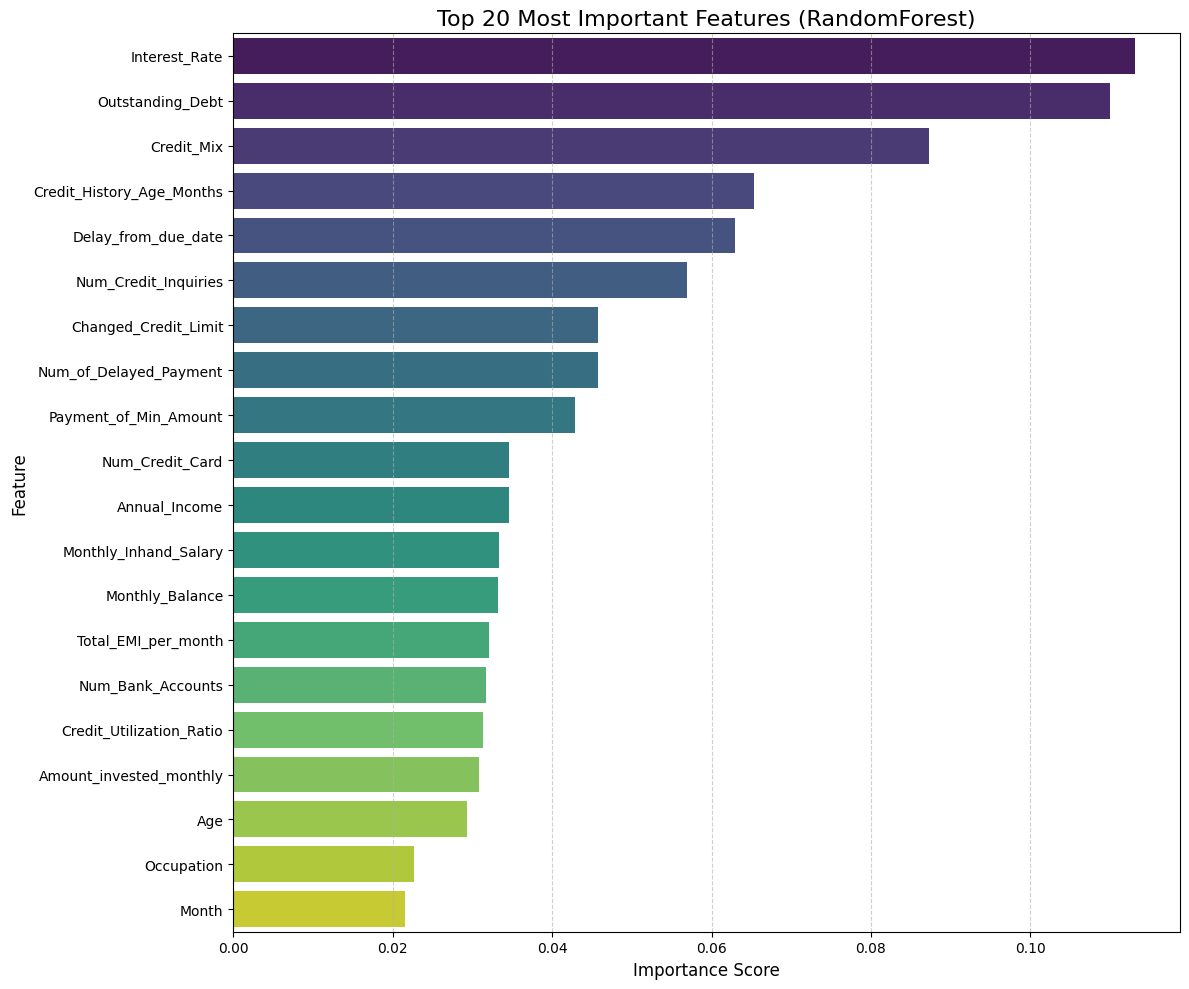

In [336]:
# --- 1. Imports ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
import numpy as np

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# This assumes 'df' is your pre-loaded DataFrame
if 'df' in locals() and df is not None:
    print("DataFrame found. Starting the time-series modeling process...")

    # --- 2. Create an Ordered Month Column for Splitting ---
    # This is crucial for performing a correct chronological split.
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['Month_Num'] = df['Month'].map(month_map)
    df = df.sort_values(by=['Customer_ID', 'Month_Num'])
    # --- 3. Time-Based Split (6 Months Train, Rest for Test) ---
    CUTOFF_MONTH = 6
    train_df = df[df['Month_Num'] <= CUTOFF_MONTH].copy()
    test_df = df[df['Month_Num'] > CUTOFF_MONTH].copy()

    print(f"Training data covers months: {sorted(train_df['Month_Num'].unique())}")
    print(f"Testing data covers months: {sorted(test_df['Month_Num'].unique())}")

    # --- 4. Preprocessing (Applied Separately to Train and Test) ---

    def impute_missing_data(train_df, test_df):
        """Handles all missing value imputation with intelligent strategies."""
        print("Step 3: Imputing missing data...")

        # Strategy 1: Fill 'Changed_Credit_Limit' with 0, as NaN likely means no change.
        train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].fillna(0)
        test_df['Changed_Credit_Limit'] = test_df['Changed_Credit_Limit'].fillna(0)
        print("  - Imputed 'Changed_Credit_Limit' with 0.")

        # Strategy 2: Forward-fill transactional data per customer.
        # This is a time-series aware imputation. We combine, ffill, then split back.
        # This correctly allows the last known value from training to fill the first missing value in testing.
        ffill_cols = ['Monthly_Balance', 'Amount_invested_monthly']

        # Store original indices to split back correctly
        train_indices = train_df.index
        test_indices = test_df.index

        # Combine the dataframes
        combined_df = pd.concat([train_df, test_df])

        # Sort by customer and time to ensure correct ffill order
        combined_df = combined_df.sort_values(by=['Customer_ID', 'Month_Num'])

        # Apply groupby and forward fill
        combined_df[ffill_cols] = combined_df.groupby('Customer_ID')[ffill_cols].ffill()

        # Split back into train and test
        train_imputed = combined_df.loc[train_indices].copy()
        test_imputed = combined_df.loc[test_indices].copy()
        print(f"  - Forward-filled {ffill_cols}.")

        # Strategy 3: Impute any remaining NaNs with a global median (as a fallback)
        # This handles cases where a customer has NO data at all for a column.
        remaining_numeric_cols = train_imputed.select_dtypes(include=np.number).columns
        for col in remaining_numeric_cols:
            if train_imputed[col].isnull().any():
                median_val = train_imputed[col].median() # Calculate median from training data only
                train_imputed[col].fillna(median_val, inplace=True)
                test_imputed[col].fillna(median_val, inplace=True)
                print(f"  - Fallback: Imputed remaining NaNs in '{col}' with training data median.")

        return train_imputed, test_imputed
    train_imputed, test_imputed = impute_missing_data(train_df, test_df)

    # Separate features and target for both sets
    X_train = train_imputed.drop(['Credit_Score', 'Month_Num', 'Customer_ID','Type_of_Loan'], axis=1)
    y_train = train_imputed['Credit_Score']


    X_test = test_imputed.drop(['Credit_Score', 'Month_Num', 'Customer_ID','Type_of_Loan'], axis=1)
    y_test = test_imputed['Credit_Score']

    # Encode the target variable (y)
    le_target = LabelEncoder()
    y_train_encoded = le_target.fit_transform(y_train)
    y_test_encoded = le_target.transform(y_test)

    # Identify categorical and numerical columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()



    # Label Encode categorical features as an alternative to one-hot encoding
    # This is much more memory-efficient and helps prevent crashes.
    print("Using Label Encoding for categorical features to save memory...")
    for col in categorical_cols:
        # FIX: Convert columns to string type to prevent mixed-type errors
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

        le = LabelEncoder()
        # Fit on all possible categories from both train and test sets
        le.fit(pd.concat([X_train[col], X_test[col]]).unique())

        # Transform both train and test data
        X_train[col] = le.transform(X_train[col])
        X_test[col] = le.transform(X_test[col])



    from imblearn.over_sampling import SMOTE
    rus = SMOTE(sampling_strategy='auto')
    X_data_rus, y_data_rus = rus.fit_resample(X_train, y_train_encoded)
    print("✅ Preprocessing complete. Data is split and encoded.")
    print(f"Training features shape: {X_data_rus.shape}")
    print(f"Testing features shape: {X_test.shape}")

    # --- 5. Define Models ---
    models = {
        "RandomForest": RandomForestClassifier(random_state=42,class_weight='balanced'),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        "LightGBM": LGBMClassifier(random_state=42)
    }

    # --- 6. Train and Evaluate Baseline Models ---
    trained_models = {}
    for name, model in models.items():
        print(f"\n--- Training {name} ---")

        # Fit the model with default parameters
        model.fit(X_data_rus, y_data_rus)
        trained_models[name] = model # Store the trained model

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test_encoded, y_pred)
        print(f"Accuracy for {name}: {accuracy:.4f}")

        report = classification_report(le_target.inverse_transform(y_test_encoded), le_target.inverse_transform(y_pred))
        print(f"Classification Report for {name}:\n{report}")
        print("="*50)

    # --- 7. Feature Importance Analysis ---
    print("\n--- Analyzing Feature Importance for RandomForest ---")

    # Get the trained RandomForest model from our dictionary
    rf_model = trained_models.get("RandomForest")

    if rf_model:
        # Extract feature importances
        importances = rf_model.feature_importances_

        # Create a DataFrame for better visualization
        feature_importance_df = pd.DataFrame({
            'Feature': X_data_rus.columns,
            'Importance': importances
        })

        # Sort the features by importance in descending order
        sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

        # Print the top 20 features
        print("\nTop 20 Most Important Features:")
        print(sorted_feature_importance)

        # Create the plot
        plt.figure(figsize=(12, 10))
        sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance, palette='viridis')
        plt.title('Top 20 Most Important Features (RandomForest)', fontsize=16)
        plt.xlabel('Importance Score', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print("Could not find the trained RandomForest model to analyze.")

else:
    print("❌ DataFrame 'df' not found. Please load your data first.")


In [334]:
X_train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Age_Months
0,3,18.0,7,30625.94,2706.161667,6,5,27,2,62,...,11.0,1,1562.91,26.612093,2,42.94109,244.750283,3,252.924793,122.0
1,2,18.0,7,30625.94,2706.161667,6,5,27,2,62,...,11.0,1,1562.91,29.439759,2,42.94109,176.132567,2,311.542510,123.0
2,6,18.0,7,30625.94,2706.161667,6,5,27,2,62,...,11.0,1,1562.91,38.285928,2,42.94109,109.056519,1,368.618557,124.0
3,0,18.0,7,30625.94,2706.161667,6,5,27,2,64,...,11.0,1,1562.91,32.843081,2,42.94109,87.909909,5,419.765167,125.0
4,7,18.0,7,30625.94,2706.161667,6,5,27,2,67,...,11.0,1,1562.91,32.330508,2,42.94109,191.834767,3,305.840309,126.0


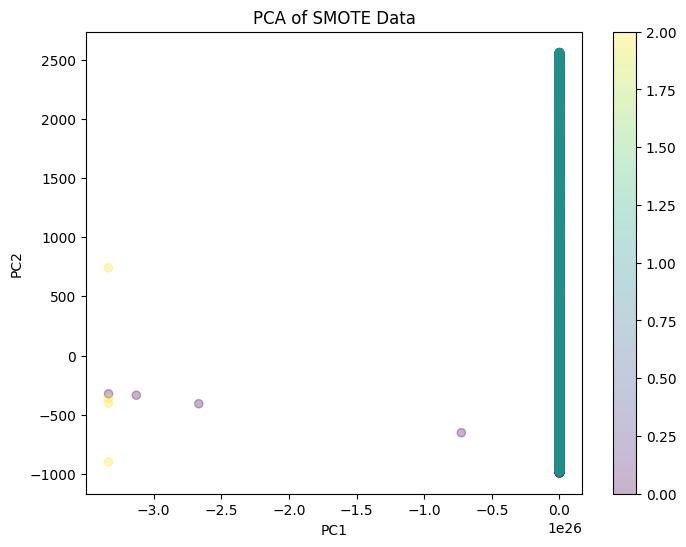

In [343]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_data_rus)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_data_rus, cmap='viridis', alpha=0.3)
plt.title("PCA of SMOTE Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

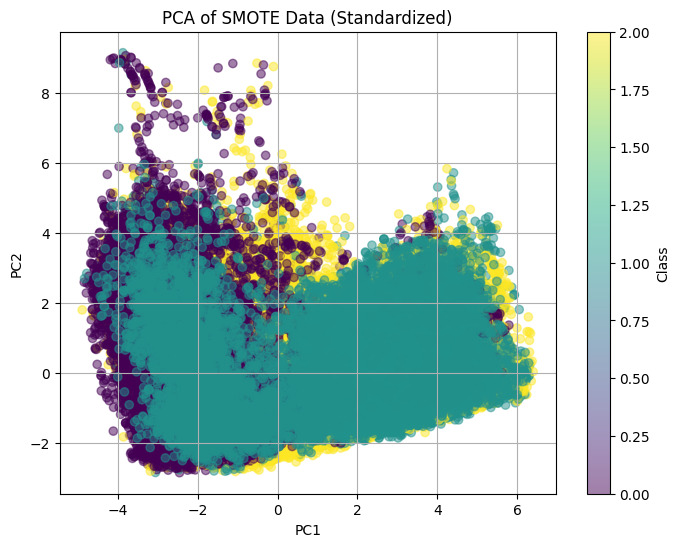

In [344]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data_rus)  # Use your resampled training data

# Step 2: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 3: Visualize
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_data_rus, cmap='viridis', alpha=0.5)
plt.title("PCA of SMOTE Data (Standardized)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Class")
plt.grid(True)
plt.show()


In [35]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.3 MB/s eta 0:00:00


In [352]:
# --- 1. Imports ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
import numpy as np

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# This assumes 'df' is your pre-loaded DataFrame
if 'df' in locals() and df is not None:
    print("DataFrame found. Starting the time-series modeling process...")

    # --- 2. Create an Ordered Month Column for Splitting ---
    # This is crucial for performing a correct chronological split.
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['Month_Num'] = df['Month'].map(month_map)
    df = df.sort_values(by=['Customer_ID', 'Month_Num'])
    # --- 3. Time-Based Split (6 Months Train, Rest for Test) ---
    CUTOFF_MONTH = 6
    train_df = df[df['Month_Num'] <= CUTOFF_MONTH].copy()
    test_df = df[df['Month_Num'] > CUTOFF_MONTH].copy()

    print(f"Training data covers months: {sorted(train_df['Month_Num'].unique())}")
    print(f"Testing data covers months: {sorted(test_df['Month_Num'].unique())}")

    # --- 4. Preprocessing (Applied Separately to Train and Test) ---

    def impute_missing_data(train_df, test_df):
        """Handles all missing value imputation with intelligent strategies."""
        print("Step 3: Imputing missing data...")

        # Strategy 1: Fill 'Changed_Credit_Limit' with 0, as NaN likely means no change.
        train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].fillna(0)
        test_df['Changed_Credit_Limit'] = test_df['Changed_Credit_Limit'].fillna(0)
        print("  - Imputed 'Changed_Credit_Limit' with 0.")

        # Strategy 2: Forward-fill transactional data per customer.
        # This is a time-series aware imputation. We combine, ffill, then split back.
        # This correctly allows the last known value from training to fill the first missing value in testing.
        ffill_cols = ['Monthly_Balance', 'Amount_invested_monthly']

        # Store original indices to split back correctly
        train_indices = train_df.index
        test_indices = test_df.index

        # Combine the dataframes
        combined_df = pd.concat([train_df, test_df])

        # Sort by customer and time to ensure correct ffill order
        combined_df = combined_df.sort_values(by=['Customer_ID', 'Month_Num'])

        # Apply groupby and forward fill
        combined_df[ffill_cols] = combined_df.groupby('Customer_ID')[ffill_cols].ffill()

        # Split back into train and test
        train_imputed = combined_df.loc[train_indices].copy()
        test_imputed = combined_df.loc[test_indices].copy()
        print(f"  - Forward-filled {ffill_cols}.")

        # Strategy 3: Impute any remaining NaNs with a global median (as a fallback)
        # This handles cases where a customer has NO data at all for a column.
        remaining_numeric_cols = train_imputed.select_dtypes(include=np.number).columns
        for col in remaining_numeric_cols:
            if train_imputed[col].isnull().any():
                median_val = train_imputed[col].median() # Calculate median from training data only
                train_imputed[col].fillna(median_val, inplace=True)
                test_imputed[col].fillna(median_val, inplace=True)
                print(f"  - Fallback: Imputed remaining NaNs in '{col}' with training data median.")

        return train_imputed, test_imputed
    # Separate features and target for both sets
    X_train = train_imputed.drop(['Credit_Score', 'Month_Num', 'Customer_ID','Type_of_Loan'], axis=1)
    y_train = train_imputed['Credit_Score']

    X_test = test_imputed.drop(['Credit_Score', 'Month_Num', 'Customer_ID','Type_of_Loan'], axis=1)
    y_test = test_imputed['Credit_Score']

    # Encode the target variable (y)
    le_target = LabelEncoder()
    y_train_encoded = le_target.fit_transform(y_train)
    y_test_encoded = le_target.transform(y_test)

    # Identify categorical and numerical columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

    # Label Encode categorical features as an alternative to one-hot encoding
    # This is much more memory-efficient and helps prevent crashes.
    # print("Using Label Encoding for categorical features to save memory...")
    # for col in categorical_cols:
    #     # FIX: Convert columns to string type to prevent mixed-type errors
    #     X_train[col] = X_train[col].astype(str)
    #     X_test[col] = X_test[col].astype(str)

    #     le = LabelEncoder()
    #     # Fit on all possible categories from both train and test sets
    #     le.fit(pd.concat([X_train[col], X_test[col]]).unique())

    #     # Transform both train and test data
    #     X_train[col] = le.transform(X_train[col])
    #     X_test[col] = le.transform(X_test[col])

    print("✅ Preprocessing complete. Data is split and encoded.")
    print(f"Training features shape: {X_train.shape}")
    print(f"Testing features shape: {X_test.shape}")


else:
    print("❌ DataFrame 'df' not found. Please load your data first.")


DataFrame found. Starting the time-series modeling process...
Training data covers months: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Testing data covers months: [np.int64(7), np.int64(8)]
✅ Preprocessing complete. Data is split and encoded.
Training features shape: (75000, 22)
Testing features shape: (25000, 22)


In [353]:
print("\n--- Training CatBoost on Original Data ---")

# Get categorical feature indices (CatBoost needs index-based list)
cat_features_indices = [X_train.columns.get_loc(col) for col in categorical_cols]

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    cat_features=cat_features_indices,
    random_seed=42,
    eval_metric='Accuracy',
    verbose=100
)

# Fit on original training data (no SMOTE)
catboost_model.fit(X_train, y_train_encoded)

# Predict on test data
y_pred_catboost = catboost_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test_encoded, y_pred_catboost)
print(f"Accuracy for CatBoost: {accuracy:.4f}")

report = classification_report(
    le_target.inverse_transform(y_test_encoded),
    le_target.inverse_transform(y_pred_catboost)
)
print(f"Classification Report for CatBoost:\n{report}")



--- Training CatBoost on Original Data ---
0:	learn: 0.6867600	total: 805ms	remaining: 13m 24s
100:	learn: 0.7274133	total: 1m 3s	remaining: 9m 26s
200:	learn: 0.7349733	total: 1m 49s	remaining: 7m 15s
300:	learn: 0.7436800	total: 2m 25s	remaining: 5m 37s
400:	learn: 0.7538800	total: 3m 3s	remaining: 4m 33s
500:	learn: 0.7625867	total: 3m 41s	remaining: 3m 40s
600:	learn: 0.7698267	total: 4m 17s	remaining: 2m 51s
700:	learn: 0.7765733	total: 4m 54s	remaining: 2m 5s
800:	learn: 0.7816800	total: 5m 30s	remaining: 1m 22s
900:	learn: 0.7873200	total: 6m 6s	remaining: 40.2s
999:	learn: 0.7924933	total: 6m 42s	remaining: 0us
Accuracy for CatBoost: 0.6666
Classification Report for CatBoost:
              precision    recall  f1-score   support

        Good       0.66      0.40      0.50      4824
        Poor       0.68      0.68      0.68      7216
    Standard       0.66      0.76      0.71     12960

    accuracy                           0.67     25000
   macro avg       0.67      0.61 

In [354]:
df['Avg_Delay_Per_Customer'] = df.groupby('Customer_ID')['Delay_from_due_date'].transform('mean')
df['Max_Delay_Per_Customer'] = df.groupby('Customer_ID')['Delay_from_due_date'].transform('max')

# Ratio Features
df['EMI_to_Income'] = df['Total_EMI_per_month'] / (df['Monthly_Inhand_Salary'] + 1e-5)
df['Debt_to_Income'] = df['Outstanding_Debt'] / (df['Monthly_Inhand_Salary'] + 1e-5)
df['Utilization_to_Income'] = df['Credit_Utilization_Ratio'] * df['Monthly_Inhand_Salary']

# Lag Features
df['Lag1_EMI'] = df.groupby('Customer_ID')['Total_EMI_per_month'].shift(1)
df['Lag1_Delay'] = df.groupby('Customer_ID')['Delay_from_due_date'].shift(1)
df['Lag1_Credit_Util'] = df.groupby('Customer_ID')['Credit_Utilization_Ratio'].shift(1)

# Fill missing lag values with median of the feature
for col in ['Lag1_EMI', 'Lag1_Delay', 'Lag1_Credit_Util']:
    df[col].fillna(df[col].median(), inplace=True)

# Trend Features
df['EMI_Trend'] = df['Total_EMI_per_month'] - df['Lag1_EMI']

# Interaction Features
df['Debt_Utilization'] = df['Outstanding_Debt'] * df['Credit_Utilization_Ratio']
df['Loans_per_Card'] = df['Num_of_Loan'] / (df['Num_Credit_Card'] + 1)

# Fill any remaining nulls
df.fillna(df.median(numeric_only=True), inplace=True)

DataFrame found. Starting the time-series modeling process...
Training data covers months: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]
Testing data covers months: [np.int64(7), np.int64(8)]
Using Label Encoding for categorical features to save memory...
✅ Preprocessing complete. Data is split and encoded.
Training features shape: (75000, 22)
Testing features shape: (25000, 22)

--- Training RandomForest ---
Accuracy for RandomForest: 0.7240
Classification Report for RandomForest:
              precision    recall  f1-score   support

        Good       0.71      0.62      0.66      4824
        Poor       0.72      0.77      0.74      7216
    Standard       0.73      0.74      0.74     12960

    accuracy                           0.72     25000
   macro avg       0.72      0.71      0.71     25000
weighted avg       0.72      0.72      0.72     25000


--- Training XGBoost ---
Accuracy for XGBoost: 0.7005
Classification Report for XGBoost:
         

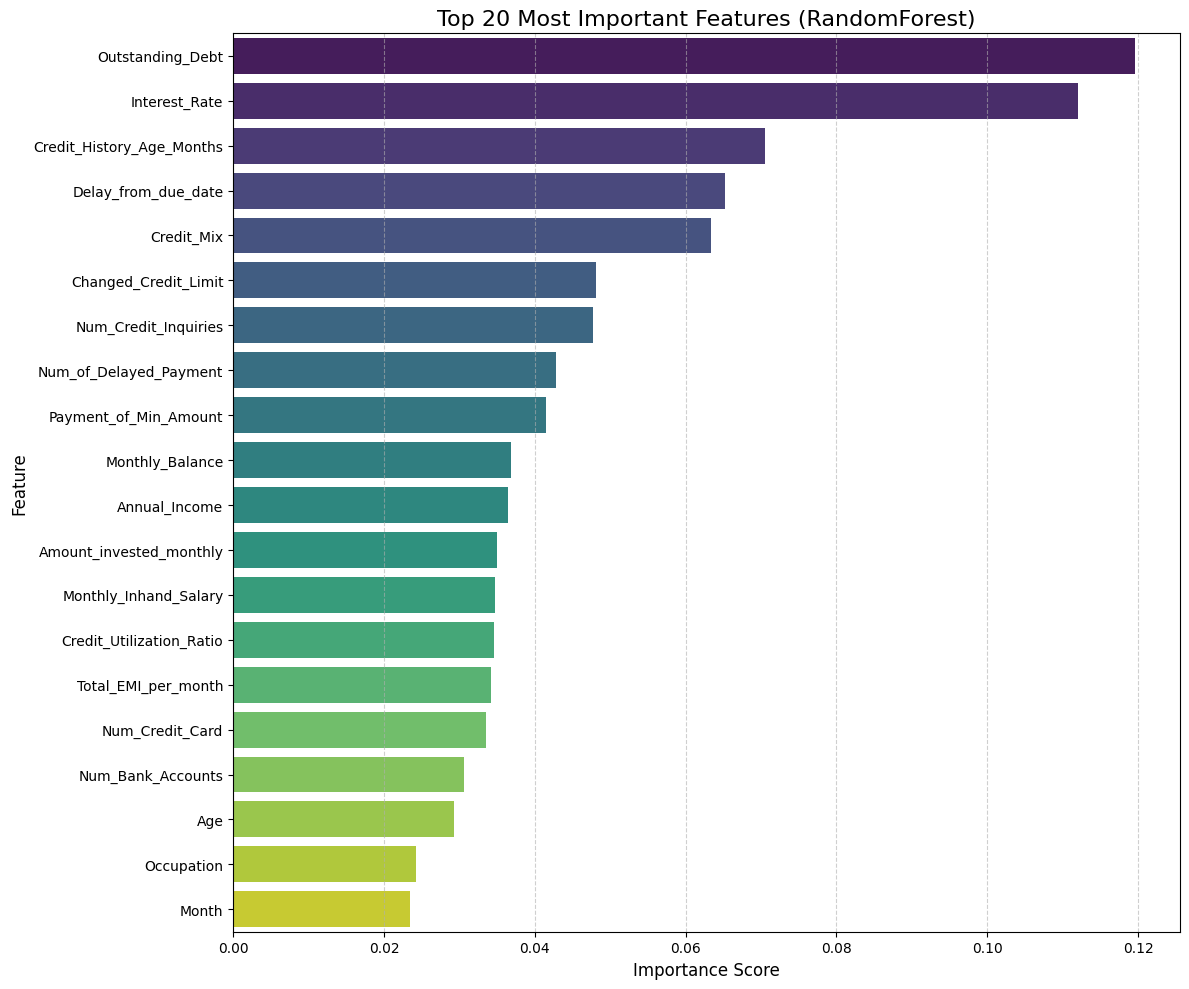

In [355]:
# --- 1. Imports ---
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
import numpy as np

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# This assumes 'df' is your pre-loaded DataFrame
if 'df' in locals() and df is not None:
    print("DataFrame found. Starting the time-series modeling process...")

    # --- 2. Create an Ordered Month Column for Splitting ---
    # This is crucial for performing a correct chronological split.
    month_map = {
        'January': 1, 'February': 2, 'March': 3, 'April': 4,
        'May': 5, 'June': 6, 'July': 7, 'August': 8,
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    df['Month_Num'] = df['Month'].map(month_map)
    df = df.sort_values(by=['Customer_ID', 'Month_Num'])
    # --- 3. Time-Based Split (6 Months Train, Rest for Test) ---
    CUTOFF_MONTH = 6
    train_df = df[df['Month_Num'] <= CUTOFF_MONTH].copy()
    test_df = df[df['Month_Num'] > CUTOFF_MONTH].copy()

    print(f"Training data covers months: {sorted(train_df['Month_Num'].unique())}")
    print(f"Testing data covers months: {sorted(test_df['Month_Num'].unique())}")

    # --- 4. Preprocessing (Applied Separately to Train and Test) ---

    def impute_missing_data(train_df, test_df):
        """Handles all missing value imputation with intelligent strategies."""
        print("Step 3: Imputing missing data...")

        # Strategy 1: Fill 'Changed_Credit_Limit' with 0, as NaN likely means no change.
        train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].fillna(0)
        test_df['Changed_Credit_Limit'] = test_df['Changed_Credit_Limit'].fillna(0)
        print("  - Imputed 'Changed_Credit_Limit' with 0.")

        # Strategy 2: Forward-fill transactional data per customer.
        # This is a time-series aware imputation. We combine, ffill, then split back.
        # This correctly allows the last known value from training to fill the first missing value in testing.
        ffill_cols = ['Monthly_Balance', 'Amount_invested_monthly']

        # Store original indices to split back correctly
        train_indices = train_df.index
        test_indices = test_df.index

        # Combine the dataframes
        combined_df = pd.concat([train_df, test_df])

        # Sort by customer and time to ensure correct ffill order
        combined_df = combined_df.sort_values(by=['Customer_ID', 'Month_Num'])

        # Apply groupby and forward fill
        combined_df[ffill_cols] = combined_df.groupby('Customer_ID')[ffill_cols].ffill()

        # Split back into train and test
        train_imputed = combined_df.loc[train_indices].copy()
        test_imputed = combined_df.loc[test_indices].copy()
        print(f"  - Forward-filled {ffill_cols}.")

        # Strategy 3: Impute any remaining NaNs with a global median (as a fallback)
        # This handles cases where a customer has NO data at all for a column.
        remaining_numeric_cols = train_imputed.select_dtypes(include=np.number).columns
        for col in remaining_numeric_cols:
            if train_imputed[col].isnull().any():
                median_val = train_imputed[col].median() # Calculate median from training data only
                train_imputed[col].fillna(median_val, inplace=True)
                test_imputed[col].fillna(median_val, inplace=True)
                print(f"  - Fallback: Imputed remaining NaNs in '{col}' with training data median.")

        return train_imputed, test_imputed
    # Separate features and target for both sets
    X_train = train_imputed.drop(['Credit_Score', 'Month_Num', 'Customer_ID','Type_of_Loan'], axis=1)
    y_train = train_imputed['Credit_Score']

    X_test = test_imputed.drop(['Credit_Score', 'Month_Num', 'Customer_ID','Type_of_Loan'], axis=1)
    y_test = test_imputed['Credit_Score']

    # Encode the target variable (y)
    le_target = LabelEncoder()
    y_train_encoded = le_target.fit_transform(y_train)
    y_test_encoded = le_target.transform(y_test)

    # Identify categorical and numerical columns
    categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()

    # Label Encode categorical features as an alternative to one-hot encoding
    # This is much more memory-efficient and helps prevent crashes.
    print("Using Label Encoding for categorical features to save memory...")
    for col in categorical_cols:
        # FIX: Convert columns to string type to prevent mixed-type errors
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

        le = LabelEncoder()
        # Fit on all possible categories from both train and test sets
        le.fit(pd.concat([X_train[col], X_test[col]]).unique())

        # Transform both train and test data
        X_train[col] = le.transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

    print("✅ Preprocessing complete. Data is split and encoded.")
    print(f"Training features shape: {X_train.shape}")
    print(f"Testing features shape: {X_test.shape}")

    # --- 5. Define Models ---
    models = {
        "RandomForest": RandomForestClassifier(random_state=42,class_weight='balanced'),
        "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
        "LightGBM": LGBMClassifier(random_state=42)
    }

    # --- 6. Train and Evaluate Baseline Models ---
    trained_models = {}
    for name, model in models.items():
        print(f"\n--- Training {name} ---")

        # Fit the model with default parameters
        model.fit(X_train, y_train_encoded)
        trained_models[name] = model # Store the trained model

        # Make predictions
        y_pred = model.predict(X_test)

        # Evaluate the model
        accuracy = accuracy_score(y_test_encoded, y_pred)
        print(f"Accuracy for {name}: {accuracy:.4f}")

        report = classification_report(le_target.inverse_transform(y_test_encoded), le_target.inverse_transform(y_pred))
        print(f"Classification Report for {name}:\n{report}")
        print("="*50)

    # --- 7. Feature Importance Analysis ---
    print("\n--- Analyzing Feature Importance for RandomForest ---")

    # Get the trained RandomForest model from our dictionary
    rf_model = trained_models.get("RandomForest")

    if rf_model:
        # Extract feature importances
        importances = rf_model.feature_importances_

        # Create a DataFrame for better visualization
        feature_importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': importances
        })

        # Sort the features by importance in descending order
        sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

        # Print the top 20 features
        print("\nTop 20 Most Important Features:")
        print(sorted_feature_importance)

        # Create the plot
        plt.figure(figsize=(12, 10))
        sns.barplot(x='Importance', y='Feature', data=sorted_feature_importance, palette='viridis')
        plt.title('Top 20 Most Important Features (RandomForest)', fontsize=16)
        plt.xlabel('Importance Score', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print("Could not find the trained RandomForest model to analyze.")

else:
    print("❌ DataFrame 'df' not found. Please load your data first.")


In [356]:
df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Max_Delay_Per_Customer,EMI_to_Income,Debt_to_Income,Utilization_to_Income,Lag1_EMI,Lag1_Delay,Lag1_Credit_Util,EMI_Trend,Debt_Utilization,Loans_per_Card
0,CUS_0x1000,January,18.0,Lawyer,30625.94,2706.161667,6,5,27,2,...,67,0.015868,0.577538,72016.626182,66.033915,18.0,32.292960,-23.092825,41592.306407,0.333333
1,CUS_0x1000,February,18.0,Lawyer,30625.94,2706.161667,6,5,27,2,...,67,0.015868,0.577538,79668.747315,42.941090,62.0,26.612093,0.000000,46011.693758,0.333333
2,CUS_0x1000,March,18.0,Lawyer,30625.94,2706.161667,6,5,27,2,...,67,0.015868,0.577538,103607.910688,42.941090,62.0,29.439759,0.000000,59837.459708,0.333333
3,CUS_0x1000,April,18.0,Lawyer,30625.94,2706.161667,6,5,27,2,...,67,0.015868,0.577538,88878.687500,42.941090,62.0,38.285928,0.000000,51330.780120,0.333333
4,CUS_0x1000,May,18.0,Lawyer,30625.94,2706.161667,6,5,27,2,...,67,0.015868,0.577538,87491.581865,42.941090,64.0,32.843081,0.000000,50529.674519,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,CUS_0xffd,April,29.0,Scientist,41398.44,3749.870000,8,7,13,6,...,25,0.048795,0.453850,136437.206746,182.976649,25.0,25.175964,0.000000,61922.080876,0.750000
99996,CUS_0xffd,May,29.0,Scientist,41398.44,3749.870000,8,7,13,6,...,25,0.048795,0.453850,98121.004305,182.976649,19.0,36.384516,0.000000,44532.257067,0.750000
99997,CUS_0xffd,June,29.0,Scientist,41398.44,3749.870000,8,7,13,6,...,25,0.048795,0.453850,138632.965362,182.976649,23.0,26.166508,0.000000,62918.626803,0.750000
99998,CUS_0xffd,July,29.0,Scientist,41398.44,3749.870000,8,7,13,6,...,25,0.048795,0.453850,127181.952096,182.976649,23.0,36.970072,0.000000,57721.579850,0.750000


reStrucure the data

In [385]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded in memory

# --- Step 1: Map Month to Numeric and Sort ---
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['Month_Num'] = df['Month'].map(month_map)
df = df.sort_values(by=['Customer_ID', 'Month_Num'])

# --- Step 2: Time-Based Train-Test Split ---
CUTOFF_MONTH = 6
train_df = df[df['Month_Num'] <= CUTOFF_MONTH].copy()
test_df = df[df['Month_Num'] > CUTOFF_MONTH].copy()

# --- Step 3: Aggregate Features Using Only Train Data ---
agg_features = train_df.groupby('Customer_ID').agg({
    'Delay_from_due_date': ['mean', 'max', 'min', 'std'],
    'Num_of_Delayed_Payment': ['mean', 'max'],
    'Outstanding_Debt': ['mean', 'max', 'min'],
    'Monthly_Balance': ['mean', 'min'],
    'Amount_invested_monthly': ['mean'],
    'Total_EMI_per_month': ['mean'],
    'Credit_Utilization_Ratio': ['mean', 'std']
})
agg_features.columns = ['_'.join(col).strip() for col in agg_features.columns.values]
agg_features.reset_index(inplace=True)

# --- Step 4: Merge Aggregates with Train/Test ---
train_df = train_df.merge(agg_features, on='Customer_ID', how='left')
test_df = test_df.merge(agg_features, on='Customer_ID', how='left')

# --- Step 5: Fill Missing Values ---
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

# --- Step 6: Drop High Leakage and Unchanging Columns ---
drop_cols = ['Month', 'Month_Num', 'Customer_ID', 'Type_of_Loan']
X_train = train_df.drop(columns=drop_cols + ['Credit_Score'])
y_train = train_df['Credit_Score']
X_test = test_df.drop(columns=drop_cols + ['Credit_Score'])
y_test = test_df['Credit_Score']

# --- Step 7: Encode Categorical Variables ---
categorical_cols = X_train.select_dtypes(include='object').columns
for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

    le = LabelEncoder()
    le.fit(list(X_train[col].unique()) + list(X_test[col].unique()))
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# --- Step 8: Encode Target Variable ---
le_target = LabelEncoder()
y_train_encoded = le_target.fit_transform(y_train)
y_test_encoded = le_target.transform(y_test)

# --- Step 9: Train CatBoostClassifier ---
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train_encoded)
y_pred = model.predict(X_test)

# --- Step 10: Evaluate ---
accuracy = accuracy_score(y_test_encoded, y_pred)
report = classification_report(le_target.inverse_transform(y_test_encoded),
                               le_target.inverse_transform(y_pred),
                               output_dict=False)

# --- Step 11: Feature Importance ---
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display results
print("🔍 Top 20 Feature Importances:")
print(feature_importance_df.head(20))

# Print model evaluation metrics
print(f"\n✅ Accuracy: {accuracy:.4f}")
print("\n📋 Classification Report:")
print(report)


🔍 Top 20 Feature Importances:
                          Feature  Importance
6                   Interest_Rate    7.721487
12                     Credit_Mix    6.071858
10           Changed_Credit_Limit    4.894579
20      Credit_History_Age_Months    4.568943
5                 Num_Credit_Card    4.457605
21       Delay_from_due_date_mean    4.102597
13               Outstanding_Debt    3.927026
35   Credit_Utilization_Ratio_std    3.918202
34  Credit_Utilization_Ratio_mean    3.874655
32   Amount_invested_monthly_mean    3.753259
30           Monthly_Balance_mean    3.519821
31            Monthly_Balance_min    3.235769
28           Outstanding_Debt_max    3.169227
24        Delay_from_due_date_std    3.127351
11           Num_Credit_Inquiries    3.107259
0                             Age    3.062166
1                      Occupation    2.867585
4               Num_Bank_Accounts    2.832981
16            Total_EMI_per_month    2.617898
22        Delay_from_due_date_max    2.504110

✅ A

✅ Accuracy: 0.7069
📋 Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.62      0.64      4824
           1       0.71      0.73      0.72      7216
           2       0.72      0.73      0.72     12960

    accuracy                           0.71     25000
   macro avg       0.70      0.69      0.69     25000
weighted avg       0.71      0.71      0.71     25000


🔍 Top 20 Most Important Features:
                          Feature  Importance
6                   Interest_Rate    7.721487
12                     Credit_Mix    6.071858
10           Changed_Credit_Limit    4.894579
20      Credit_History_Age_Months    4.568943
5                 Num_Credit_Card    4.457605
21       Delay_from_due_date_mean    4.102597
13               Outstanding_Debt    3.927026
35   Credit_Utilization_Ratio_std    3.918202
34  Credit_Utilization_Ratio_mean    3.874655
32   Amount_invested_monthly_mean    3.753259
30           Monthly_Balance_mean 

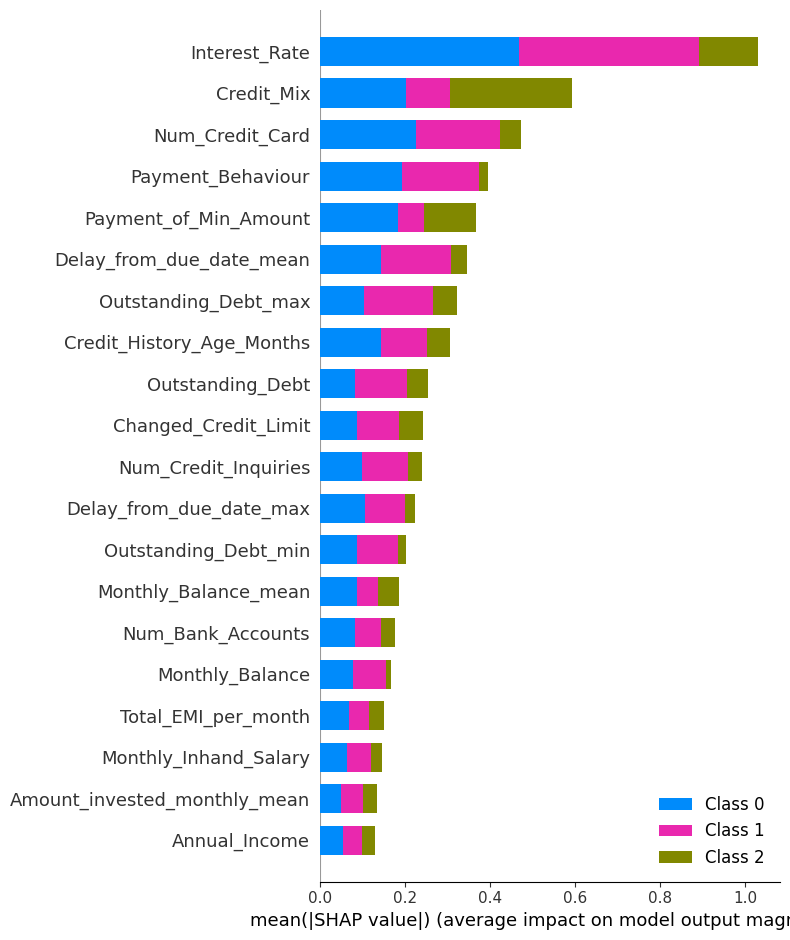

In [389]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings

warnings.filterwarnings("ignore")

# --- Step 1: Month Mapping ---
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['Month_Num'] = df['Month'].map(month_map)
df = df.sort_values(by=['Customer_ID', 'Month_Num'])

# --- Step 2: Time-Based Split ---
CUTOFF_MONTH = 6
train_df = df[df['Month_Num'] <= CUTOFF_MONTH].copy()
test_df = df[df['Month_Num'] > CUTOFF_MONTH].copy()

# --- Step 3: Aggregated Features (from train only to avoid leakage) ---
agg_features = train_df.groupby('Customer_ID').agg({
    'Delay_from_due_date': ['mean', 'max', 'min', 'std'],
    'Num_of_Delayed_Payment': ['mean', 'max'],
    'Outstanding_Debt': ['mean', 'max', 'min'],
    'Monthly_Balance': ['mean', 'min'],
    'Amount_invested_monthly': ['mean'],
    'Total_EMI_per_month': ['mean'],
    'Credit_Utilization_Ratio': ['mean', 'std']
})
agg_features.columns = ['_'.join(col).strip() for col in agg_features.columns.values]
agg_features.reset_index(inplace=True)

# --- Step 4: Merge Aggregates ---
train_df = train_df.merge(agg_features, on='Customer_ID', how='left')
test_df = test_df.merge(agg_features, on='Customer_ID', how='left')

# --- Step 5: Fill Any Nulls ---
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

# --- Step 6: Feature Drop ---
drop_cols = ['Month', 'Month_Num', 'Customer_ID', 'Type_of_Loan']
X_train = train_df.drop(columns=drop_cols + ['Credit_Score'])
y_train = train_df['Credit_Score']
X_test = test_df.drop(columns=drop_cols + ['Credit_Score'])
y_test = test_df['Credit_Score']

# --- Step 7: Encode Categorical Columns ---
categorical_cols = X_train.select_dtypes(include='object').columns
for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

    le = LabelEncoder()
    le.fit(pd.concat([X_train[col], X_test[col]], axis=0))
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# --- Step 8: Encode Target ---
le_target = LabelEncoder()
y_train_encoded = le_target.fit_transform(y_train)
y_test_encoded = le_target.transform(y_test)

# --- Step 9: Train CatBoost ---
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train_encoded)
y_pred = model.predict(X_test)

# --- Step 10: Evaluation ---
accuracy = accuracy_score(y_test_encoded, y_pred)
report = classification_report(le_target.inverse_transform(y_test_encoded),
                               le_target.inverse_transform(y_pred))

# --- Step 11: Feature Importance ---
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# --- Output Results ---
print("✅ Accuracy:", round(accuracy, 4))
print("📋 Classification Report:")
print(report)
print("\n🔍 Top 20 Most Important Features:")
print(feature_importance_df.head(20))

# --- Step 12 (Optional): SHAP Summary Plot ---
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X_test.columns, plot_type="bar")


🔍 Running Grid Search (this may take time)...
Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



✅ Best Hyperparameters:
{'border_count': 64, 'depth': 8, 'iterations': 300, 'l2_leaf_reg': 1, 'learning_rate': 0.01}

🎯 Accuracy on Test Set: 0.6386

📋 Classification Report:
              precision    recall  f1-score   support

        Good       0.52      0.57      0.55      4824
        Poor       0.67      0.59      0.63      7216
    Standard       0.67      0.69      0.68     12960

    accuracy                           0.64     25000
   macro avg       0.62      0.62      0.62     25000
weighted avg       0.64      0.64      0.64     25000



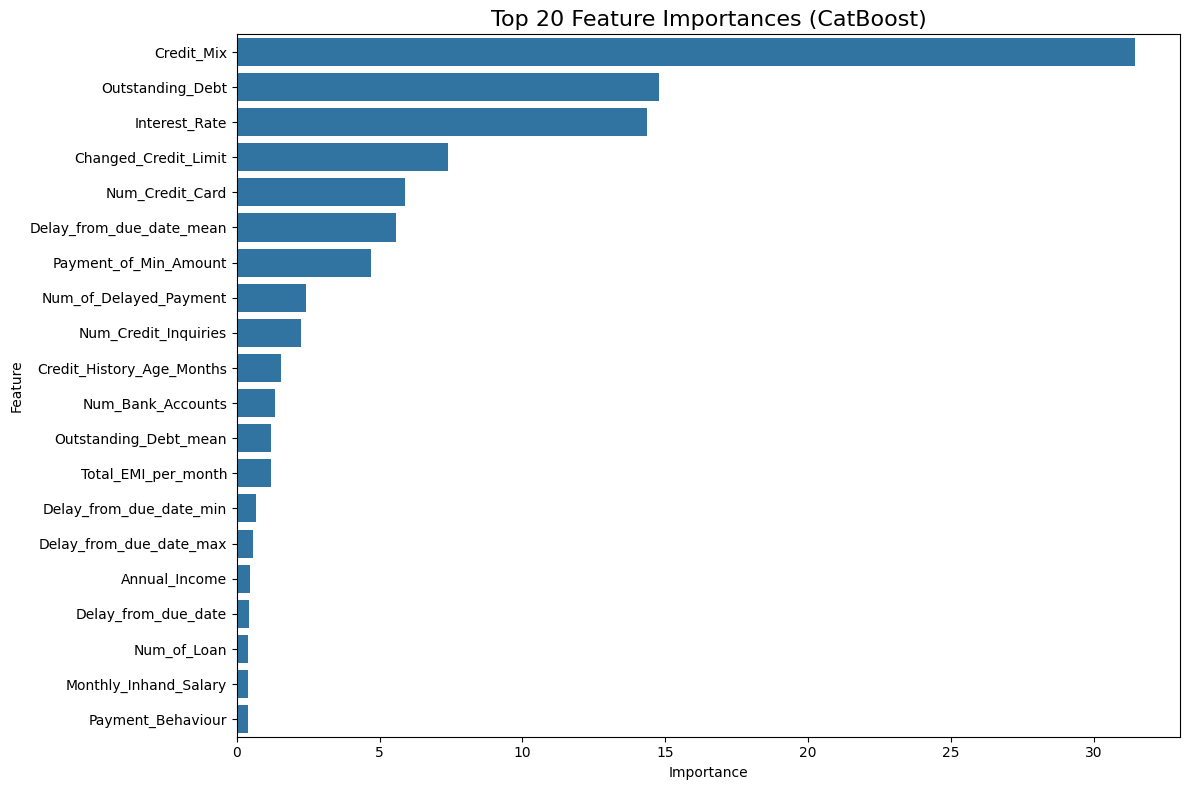

In [36]:
# --- Imports ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load and Prepare Data ---
# Assuming df is already loaded in memory

# Step 1: Month to Numeric
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['Month_Num'] = df['Month'].map(month_map)
df = df.sort_values(by=['Customer_ID', 'Month_Num'])

# Step 2: Time-based Split
CUTOFF_MONTH = 6
train_df = df[df['Month_Num'] <= CUTOFF_MONTH].copy()
test_df = df[df['Month_Num'] > CUTOFF_MONTH].copy()

# Step 3: Aggregated Features
agg_features = train_df.groupby('Customer_ID').agg({
    'Delay_from_due_date': ['mean', 'max', 'min', 'std'],
    'Num_of_Delayed_Payment': ['mean', 'max'],
    'Outstanding_Debt': ['mean', 'max', 'min'],
    'Monthly_Balance': ['mean', 'min'],
    'Amount_invested_monthly': ['mean'],
    'Total_EMI_per_month': ['mean'],
    'Credit_Utilization_Ratio': ['mean', 'std']
})
agg_features.columns = ['_'.join(col).strip() for col in agg_features.columns.values]
agg_features.reset_index(inplace=True)

# Step 4: Merge + Fill NaNs
train_df = train_df.merge(agg_features, on='Customer_ID', how='left')
test_df = test_df.merge(agg_features, on='Customer_ID', how='left')
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

# Step 5: Feature/Target Split
drop_cols = ['Month', 'Month_Num', 'Customer_ID', 'Type_of_Loan']
X_train = train_df.drop(columns=drop_cols + ['Credit_Score'])
y_train = train_df['Credit_Score']
X_test = test_df.drop(columns=drop_cols + ['Credit_Score'])
y_test = test_df['Credit_Score']

# Step 6: Encode Categorical
categorical_cols = X_train.select_dtypes(include='object').columns
for col in categorical_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)
    le = LabelEncoder()
    le.fit(list(X_train[col].unique()) + list(X_test[col].unique()))
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Step 7: Encode Target
le_target = LabelEncoder()
y_train_encoded = le_target.fit_transform(y_train)
y_test_encoded = le_target.transform(y_test)

# --- Grid Search for CatBoostClassifier ---
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 300],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64]
}

cat_model = CatBoostClassifier(
    task_type='GPU',  # Use 'CPU' if no GPU
    devices='0',
    verbose=0,
    random_state=42,
    allow_writing_files=False
)

grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

print("🔍 Running Grid Search (this may take time)...")
grid_search.fit(X_train, y_train_encoded)

# --- Best Model Evaluation ---
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Accuracy & Report
accuracy = accuracy_score(y_test_encoded, y_pred)
report = classification_report(le_target.inverse_transform(y_test_encoded),
                               le_target.inverse_transform(y_pred))

print("\n✅ Best Hyperparameters:")
print(grid_search.best_params_)

print(f"\n🎯 Accuracy on Test Set: {accuracy:.4f}")
print("\n📋 Classification Report:")
print(report)

# --- Feature Importance ---
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances (CatBoost)', fontsize=16)
plt.tight_layout()
plt.show()
